In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
np.random.seed(3)
tf.set_random_seed(3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Data Loading

In [293]:
train = pd.read_csv('../cs282-f17-xuefeng-yi-david/data/train_scaled_encoded.csv')

In [294]:
test = pd.read_csv('../cs282-f17-xuefeng-yi-david/data/test_scaled_encoded.csv')

In [4]:
# define an action mapping - how to get an id representing the action from the (iv, vaso) tuple
action_map = {}
count = 0
for iv in range(5):
    for vaso in range(5):
        action_map[(iv, vaso)] = count
        count += 1

In [5]:
def obser2traj(df):
    trajectory = []
    for i, obser in df.iterrows():
        if i + 1 == df.shape[0]:
            break
        if obser['icustayid'] == df.loc[i+1, 'icustayid']:
            next_s = df.iloc[i+1, :200]
            r = df.loc[i+1, 'reward']
            iv, vaso = obser['iv_input'], obser['vaso_input']
            a = action_map[ (iv, vaso) ]
            trajectory += [ obser[:200].tolist() + [a, r] + next_s.tolist() ]
    return np.array(trajectory)

In [6]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,vaso_input,iv_input,reward,icustayid
0,0.029027,0.061212,0.224086,0.079448,0.052524,0.077151,0.103817,0.063714,0.032102,0.042459,...,0.083823,0.053838,0.081020,0.057297,0.030372,0.047363,0,0.0,0.0,12.0
1,0.031518,0.078677,0.120369,0.040228,0.047623,0.104624,0.093498,0.073046,0.035958,0.056553,...,0.088714,0.073047,0.083202,0.043883,0.036930,0.057726,0,0.0,0.0,12.0
2,0.030942,0.083416,0.106333,0.040481,0.039120,0.098819,0.077658,0.074696,0.041053,0.053553,...,0.092754,0.079161,0.082560,0.041910,0.036587,0.067986,0,0.0,0.0,12.0
3,0.042970,0.050963,0.090261,0.093201,0.031332,0.057674,0.032040,0.054802,0.061447,0.053960,...,0.098049,0.074196,0.088113,0.045784,0.041096,0.129189,0,0.0,15.0,12.0
4,0.064572,0.084793,0.065976,0.070753,0.063990,0.051591,0.050112,0.049624,0.092619,0.080058,...,0.032011,0.081824,0.037519,0.061251,0.071471,0.039540,0,4.0,0.0,14.0


In [7]:
train_trajectory = obser2traj(train)

In [8]:
test_trajectory = obser2traj(test)

In [9]:
pd.DataFrame(train_trajectory).head()

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,0.029027,0.061212,0.224086,0.079448,0.052524,0.077151,0.103817,0.063714,0.032102,0.042459,...,0.039969,0.095765,0.042694,0.056065,0.088714,0.073047,0.083202,0.043883,0.036930,0.057726
1,0.031518,0.078677,0.120369,0.040228,0.047623,0.104624,0.093498,0.073046,0.035958,0.056553,...,0.036153,0.091474,0.040516,0.047595,0.092754,0.079161,0.082560,0.041910,0.036587,0.067986
2,0.030942,0.083416,0.106333,0.040481,0.039120,0.098819,0.077658,0.074696,0.041053,0.053553,...,0.039244,0.076928,0.035620,0.049354,0.098049,0.074196,0.088113,0.045784,0.041096,0.129189
3,0.064572,0.084793,0.065976,0.070753,0.063990,0.051591,0.050112,0.049624,0.092619,0.080058,...,0.064808,0.046426,0.089100,0.049091,0.033054,0.075375,0.040486,0.053812,0.067138,0.043424
4,0.074025,0.079019,0.069797,0.068576,0.069831,0.043737,0.056884,0.073837,0.073740,0.075134,...,0.061861,0.046455,0.084397,0.048288,0.033664,0.081671,0.043017,0.054578,0.068782,0.045069


In [10]:
pd.DataFrame(test_trajectory).head()

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,0.044787,0.024944,0.059501,0.186372,0.099174,0.010116,0.015910,0.031792,0.063170,0.050696,...,0.021701,0.038107,0.061600,0.108691,0.037210,0.051388,0.044145,0.039312,0.096143,0.013473
1,0.048257,0.029508,0.033046,0.102542,0.107019,0.015018,0.014971,0.034197,0.057205,0.072662,...,0.022810,0.041783,0.065208,0.082646,0.037256,0.055131,0.042269,0.039004,0.103266,0.015244
2,0.041906,0.028968,0.028705,0.111719,0.098205,0.013579,0.012648,0.027884,0.074506,0.081935,...,0.020972,0.042322,0.064329,0.083004,0.037022,0.057600,0.039294,0.038362,0.117384,0.015660
3,0.040383,0.029019,0.029167,0.131740,0.099840,0.013389,0.012455,0.028260,0.072425,0.088626,...,0.021475,0.043898,0.068749,0.089298,0.036816,0.058196,0.038383,0.038041,0.123431,0.014925
4,0.045685,0.029040,0.027817,0.137894,0.106901,0.013968,0.012697,0.028393,0.073113,0.088150,...,0.020937,0.044473,0.070230,0.085311,0.037636,0.060717,0.035866,0.037669,0.124448,0.015627


### DQN

In [17]:
class SumTree:
    data_pointer = 0
    def __init__(self, capacity):
        self.capacity = capacity  # for all priority values
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)  # for all transitions
    
    def add(self, p, data):
        tree_idx = self.data_pointer + self.capacity - 1
        self.data[self.data_pointer] = data  # update data_frame
        self.update(tree_idx, p)  # update tree_frame

        self.data_pointer += 1
        if self.data_pointer >= self.capacity:  # replace when exceed the capacity
            self.data_pointer = 0

    def update(self, tree_idx, p):
        change = p - self.tree[tree_idx]
        self.tree[tree_idx] = p
        # then propagate the change through tree
        while tree_idx != 0:    # this method is faster than the recursive loop in the reference code
            tree_idx = (tree_idx - 1) // 2
            self.tree[tree_idx] += change

    def get_leaf(self, v):
        """
        Tree structure and array storage:
        Tree index:
             0         -> storing priority sum
            / \
          1     2
         / \   / \
        3   4 5   6    -> storing priority for transitions
        Array type for storing:
        [0,1,2,3,4,5,6]
        """
        parent_idx = 0
        while True:     # the while loop is faster than the method in the reference code
            cl_idx = 2 * parent_idx + 1         # this leaf's left and right kids
            cr_idx = cl_idx + 1
            if cl_idx >= len(self.tree):        # reach bottom, end search
                leaf_idx = parent_idx
                break
            else:       # downward search, always search for a higher priority node
                if v <= self.tree[cl_idx]:
                    parent_idx = cl_idx
                else:
                    v -= self.tree[cl_idx]
                    parent_idx = cr_idx

        data_idx = leaf_idx - self.capacity + 1
        return leaf_idx, self.tree[leaf_idx], self.data[data_idx]

    @property
    def total_p(self):
        return self.tree[0]  # the root

In [18]:
class Memory(object):  # stored as ( s, a, r, s_ ) in SumTree
    """
    This SumTree code is modified version and the original code is from:
    https://github.com/jaara/AI-blog/blob/master/Seaquest-DDQN-PER.py
    """
    epsilon = 0.01  # small amount to avoid zero priority
    alpha = 0.6  # [0~1] convert the importance of TD error to priority
    beta = 0.9  # importance-sampling, from initial value increasing to 1
    beta_increment_per_sampling = 0.001
    abs_err_upper = 1.  # clipped abs error

    def __init__(self, capacity):
        self.tree = SumTree(capacity)

    def store(self, transition):
        max_p = np.max(self.tree.tree[-self.tree.capacity:])
        if max_p == 0:
            max_p = self.abs_err_upper
        self.tree.add(max_p, transition)   # set the max p for new p

    def sample(self, n):
        b_idx, b_memory, ISWeights = np.empty((n,), dtype=np.int32), np.empty((n, self.tree.data[0].size)), np.empty((n, 1))
        pri_seg = self.tree.total_p / n       # priority segment
        self.beta = np.min([1., self.beta + self.beta_increment_per_sampling])  # max = 1

        min_prob = np.min(self.tree.tree[-self.tree.capacity:]) / self.tree.total_p     # for later calculate ISweight
        for i in range(n):
            a, b = pri_seg * i, pri_seg * (i + 1)
            v = np.random.uniform(a, b)
            idx, p, data = self.tree.get_leaf(v)
            prob = p / self.tree.total_p
            ISWeights[i, 0] = np.power(prob/min_prob, -self.beta)
            b_idx[i], b_memory[i, :] = idx, data
        return b_idx, b_memory, ISWeights

    def batch_update(self, tree_idx, abs_errors):
        abs_errors += self.epsilon  # convert to abs and avoid 0
        clipped_errors = np.minimum(abs_errors, self.abs_err_upper)
        ps = np.power(clipped_errors, self.alpha)
        for ti, p in zip(tree_idx, ps):
            self.tree.update(ti, p)

In [247]:
save_path = "./dqn_test/xavier2.5m/ckpt"

In [248]:

class DQN:
    
    def __init__(
        self,
        num_actions,
        num_features,
        hidden_units = 128,
        learning_rate=0.0001,
        reward_discount = 0.99,
        epsilon_greedy = 0.9,
        lamda = 5,
        e_increment = None,
        replace_target_iter = 200,
        mem_size = 2000,
        batch_size = 30,
        Rmax = 15,
        dueling = False,
        prioritized = True,
        output_graph = False,
        output_path = None,
        sess = None
    ):
        # network layer sizes
        self.num_actions, self.num_features = num_actions, num_features
        self.hidden_units = hidden_units
        # training 
        self.lr = learning_rate
        self.gamma = reward_discount
        self.replace_target_iter = replace_target_iter
        self.memory_size = mem_size
        self.batch_size = batch_size
        self.lamda = lamda
        self.phase = True
        # epsilon
        self.e_increment = e_increment
        self.e_max = epsilon_greedy
        self.epsilon = 0 if e_increment else (1 - self.e_max)
        
        self.dueling = dueling
        self.prioritized = prioritized
        self.learn_step_counter = 0
        # reward
        self.rmax = Rmax
        
        # s, a, r ,s_
        if self.prioritized:
            self.memory = Memory(capacity=self.memory_size)
        else:
            self.memory = np.zeros((self.memory_size, 2 * self.num_features + self.num_actions + 1))
        
        #build net
        self.__build_net__()
        # sync target network
        self.sync_target_op = [tf.assign(t, e) for t, e in zip(tf.get_collection('target_net_params'), \
                                                               tf.get_collection('eval_net_params'))]
        
        if not sess:
            self.sess = tf.Session()
        else:
            self.sess = sess
        
        if output_graph:
            if not output_path: output_path = ''
            else: output_path += '/'
            self.writer = tf.summary.FileWriter("logs/" + output_path, self.sess.graph)
        
        self.saver = tf.train.Saver(tf.global_variables())
        self.sess.run(tf.global_variables_initializer())
        
    def __build_net__(self):
        
        def build_layers(s, c_names, summary=True):
            # use xavier_initializer with normal distribution
            w_init, b_init = tf.contrib.layers.xavier_initializer(), tf.zeros_initializer()
            # tf.random_normal_initializer(0., 0.3)
            # tf.contrib.layers.xavier_initializer()
            # tf.contrib.layers.xavier_initializer(uniform=False)
            # inpyt layer
            with tf.variable_scope('l1'):
                w1 = tf.get_variable('w1', [self.num_features, self.hidden_units], initializer=w_init, collections=c_names)
                b1 = tf.get_variable('b1', [1, self.hidden_units], initializer=b_init, collections=c_names)
                # l1 = tf.nn.relu(tf.matmul(s, w1) + b1)
                l1 = tf.matmul(s, w1) + b1
            
            with tf.variable_scope('l1_bn_ac'):
                l1_bn = tf.layers.batch_normalization(l1, training=self.phase)
                l1_ac = tf.maximum(l1_bn, l1_bn * 0.5)
            
            with tf.variable_scope('l2'):
                w2 = tf.get_variable('w2', [self.hidden_units, self.hidden_units], initializer=w_init, collections=c_names)
                b2 = tf.get_variable('b2', [1, self.hidden_units], initializer=b_init, collections=c_names)
                # l2 = tf.nn.relu(tf.matmul(l1_ac, w2) + b2)
                l2 = tf.matmul(l1_ac, w2) + b2
            
            with tf.variable_scope('l2_bn_ac'):
                l2_bn = tf.layers.batch_normalization(l2, training=self.phase)
                l2_ac = tf.maximum(l2_bn, l2_bn * 0.5)
            
            if self.dueling:
                # state value
                with tf.variable_scope('Value'):
                    w3 = tf.get_variable('w3', [self.hidden_units, 1], initializer=w_init, collections=c_names)
                    b3 = tf.get_variable('b3', [1, 1], initializer=b_init, collections=c_names)
                    self.V = tf.matmul(l2_ac, w3) + b3
                # action value
                with tf.variable_scope('Advantage'):
                    w3 = tf.get_variable('w3', [self.hidden_units, self.num_actions], initializer=w_init, collections=c_names)
                    b3 = tf.get_variable('b3', [1, self.num_actions], initializer=b_init, collections=c_names)
                    self.A = tf.matmul(l2_ac, w3) + b3
                # output Q value layer
                with tf.variable_scope('Q'):
                    # Q = V(s) + A(s,a)
                    out = self.V + (self.A - tf.reduce_mean(self.A, axis=1, keep_dims=True))
            else:
                # output Q value layer
                with tf.variable_scope('Q'):
                    w3 = tf.get_variable('w3', [self.hidden_units, self.num_actions], initializer=w_init, collections=c_names)
                    b3 = tf.get_variable('b3', [1, self.num_actions], initializer=b_init, collections=c_names)
                    out = tf.matmul(l2_ac, w3) + b3
            
            return out
        
        ## ------------------ build evaluate_net ------------------
        # input, i.e state
        self.s = tf.placeholder(tf.float32, [None, self.num_features], name='s')
        self.q_target = tf.placeholder(tf.float32, [None, self.num_actions], name='q_target')
        
        if self.prioritized:
            self.ISWeights = tf.placeholder(tf.float32, [None, 1], name='IS_weights')
        
        with tf.variable_scope('eval_net'):
            self.q_eval = build_layers(self.s, ['eval_net_params', tf.GraphKeys.GLOBAL_VARIABLES])
        
        with tf.variable_scope('loss'):
            
            if self.prioritized:
                self.abs_errors = tf.reduce_sum(tf.abs(self.q_target - self.q_eval), axis=1)
                self.loss = tf.reduce_mean(self.ISWeights * tf.squared_difference(self.q_target, self.q_eval)) + \
                            self.lamda * tf.reduce_sum(tf.maximum(tf.abs(self.q_eval) - self.rmax, 0))

            else:
                self.loss = tf.reduce_mean(tf.squared_difference(self.q_target, self.q_eval)) + \
                            self.lamda * tf.reduce_sum(tf.maximum(tf.abs(self.q_eval) - self.rmax, 0))
        
        with tf.variable_scope('train'):
            self._train_op = tf.train.AdamOptimizer(self.lr).minimize(self.loss)
        
        with tf.variable_scope('predict'):
            self.predict = tf.argmax(self.q_eval, 1, name='predict')
        
        ## ------------------ build target_net ------------------
        self.s_ = tf.placeholder(tf.float32, [None, self.num_features], name='s_')
        
        with tf.variable_scope('target_net'):
            self.q_next = build_layers(self.s_, ['target_net_params', tf.GraphKeys.GLOBAL_VARIABLES], summary=False)
        
        ## ------------------ summary ------------------
        tf.summary.scalar('loss', self.loss)
        self.merged = tf.summary.merge_all()
        
    def store_transition(self, histories):
        if self.prioritized:
            for history in histories:
                self.memory.store(history)
        else:
            self.memory = histories

    def learn(self):
        self.phase = True
        if self.learn_step_counter % self.replace_target_iter == 0 and self.learn_step_counter != 0:
            self.sess.run(self.sync_target_op)
            # print('target_params_synced')
        
        if self.prioritized:
            tree_idx, batch_memory, ISWeights = self.memory.sample(self.batch_size)
        else:
            sample_index = np.random.choice(self.memory_size, size=self.batch_size)
            batch_memory = self.memory[sample_index, :]
        
        # next observation
        q_next, q_eval = self.sess.run([self.q_next, self.q_eval], 
                               feed_dict={
                                   self.s_: batch_memory[:, -self.num_features:],
                                   self.s: batch_memory[:, :self.num_features]})
        
        q_next[q_next > self.rmax] = self.rmax
        q_next[q_next < -self.rmax] = - self.rmax
        
        q_target = q_eval.copy()
        
        batch_index = np.arange(self.batch_size, dtype=np.int32)
        eval_act_index = batch_memory[:, self.num_features].astype(int)
        reward = batch_memory[:, self.num_features + 1]
        
        q_target[batch_index, eval_act_index] = reward + self.gamma * np.max(q_next, axis=1)
        
        if self.prioritized:
            _, abs_errors, cost, summary = self.sess.run([self._train_op, self.abs_errors, self.loss, self.merged],
                                         feed_dict={self.s: batch_memory[:, :self.num_features],
                                                    self.q_target: q_target,
                                                    self.ISWeights: ISWeights })
            self.memory.batch_update(tree_idx, abs_errors) 
        else:
            _, cost, summary = self.sess.run([self._train_op, self.loss, self.merged],
                                         feed_dict={self.s: batch_memory[:, :self.num_features],
                                                    self.q_target: q_target })
        
        self.writer.add_summary(summary, self.learn_step_counter)
        
        if self.learn_step_counter % 1000 == 0 and self.learn_step_counter > 0:
            self.saver.save(self.sess, save_path)
            print("Saved Model, step is " + str(self.learn_step_counter))
        
        if self.e_increment:
            if self.epsilon < self.e_max:
                self.epsilon += self.e_increment 
            else:
                self.epsilon = self.e_max
            
        self.learn_step_counter += 1
        
        # physician policy
        physcian_actions = eval_act_index
        # agent policy
        agent_actions = np.argmax(q_eval, axis=1)
        
        return cost, physcian_actions, agent_actions
    
    def evaluate(self, val_set):
        
        self.phase = False
        
        s, a, r, s_ = val_set[:, :self.num_features], val_set[:, self.num_features].astype(int), \
                      val_set[:, self.num_features + 1], val_set[:, -self.num_features:]
        
        q_eval = self.sess.run(self.q_eval, {self.s: s})
        
        agent_actions = np.argmax(q_eval, axis=1)
        physician_q = q_eval[range(len(q_eval)), a]
        agent_q = q_eval[range(len(q_eval)), agent_actions]
        
        return a, agent_actions, physician_q, agent_q

In [249]:
def train(model, histories, num_epoches=10): # val_histories
    cost_hist, mean_q = [], []
    # shuffle histories
    np.random.shuffle(histories)
    # insert memory
    model.store_transition(histories[:model.memory_size,:])
    # learn
    for step in range(num_epoches):
        loss, phy_actions, agent_actions = model.learn()
        if step % 1000 == 0 and step > 0:
            print ( 'step:{}, loss:{}'.format(step, loss) )
            cost_hist += [ (step, loss) ]
            print ( 'physcian actions: ', phy_actions )
            print ( 'agent actions: ',  agent_actions )
            phy_a, agent_a, physician_q, agent_q = model.evaluate(test_trajectory)
            mean_q += [ (step, np.mean(physician_q), np.mean(agent_q)) ]
            print ('mean physician Q: ', np.mean(physician_q))
            print ('mean agent Q: ', np.mean(agent_q))
            print ('----------------------------------')
    return phy_a, agent_a, physician_q, agent_q, cost_hist, mean_q

In [337]:
def predict(x):
    with tf.Session() as sess:
        print('Trying to load model...')
        try:
            restorer = tf.train.import_meta_graph(save_path + '.meta')
            restorer.restore(sess, tf.train.latest_checkpoint('./dqn_test/2m'))
            print ("Model restored")
        except IOError:
            print ("No previous model found, running default init")
            sess.run(init)
            
        dueling_DQN.phase = False
        
#         s, a, r, s_ = x[:, :dueling_DQN.num_features], x[:, dueling_DQN.num_features].astype(int), \
#                       x[:, dueling_DQN.num_features + 1], x[:, -dueling_DQN.num_features:]
        s, a = x
        q_eval = sess.run(dueling_DQN.q_eval, {dueling_DQN.s: s})
        
        agent_actions = np.argmax(q_eval, axis=1)
        physician_q = q_eval[range(len(q_eval)), a]
        agent_q = q_eval[range(len(q_eval)), agent_actions]
    
    return a, agent_actions, physician_q, agent_q

In [251]:
### main
tf.reset_default_graph()
tf.set_random_seed(7)
np.random.seed(7)

MEMORY_SIZE = train_trajectory.shape[0]
ACTION_SPACE = 25
FEATURES = 200
NUM_EPOCHES = 2500000

sess = tf.Session()
## speicify output_path while tunning parameters
with tf.variable_scope('dueling'):
    dueling_DQN = DQN(
        num_actions=ACTION_SPACE, num_features=FEATURES, batch_size=32, mem_size=MEMORY_SIZE,
        dueling=True, output_graph=True)
    
sess.run(tf.global_variables_initializer())
phy_actions, agent_actions, physician_q, agent_q, cost_hist, mean_q = \
    train(dueling_DQN, train_trajectory, num_epoches=NUM_EPOCHES)

Saved Model, step is 1000
step:1000, loss:0.09491939842700958
physcian actions:  [ 0 22  0 20  0  0 15  0  0  5  0 10  5  8 22  5  5  4  5 15  5 16  5  8  5
 10 15 15 20 10 20 11]
agent actions:  [20 17  0  0  5 13 20  0 16 22 10 15  5 23 20 22 15 20 10 20  5 22  0 20  0
 20 23 23  7 10 12 13]
mean physician Q:  1.82136
mean agent Q:  3.26541
----------------------------------
Saved Model, step is 2000
step:2000, loss:0.0679163932800293
physcian actions:  [24 10 20 20  0  5  5  5 20  0 15 10 24  7 20  5 16 20 15 13  5  0 20  0 15
 10  0  0  0 12  0 15]
agent actions:  [ 7 10 20  7  9 10 23  5 20  5 20 22  4 22  0  0  5 10 23 21  5 15  2  7 23
  1 10  0 23  7 15 15]
mean physician Q:  2.07032
mean agent Q:  3.45091
----------------------------------
Saved Model, step is 3000
step:3000, loss:0.09797429293394089
physcian actions:  [15  0 20  5 20 20 15 15 16 10  0  5  0 12 15  0  0  0 20 15 20 24 15 15  0
  5 15  8  5 20  0 20]
agent actions:  [20 23  7  5 15 20  5 10 19 15 23 23  1 22 10

mean physician Q:  3.86677
mean agent Q:  4.8661
----------------------------------
Saved Model, step is 23000
step:23000, loss:0.08668182045221329
physcian actions:  [ 0 15 19  2  5  3 22  0  0 20 10 10 10  0 10  0 10 20  5  5 10 10 15  0 10
  0 15 20 15  0 11  0]
agent actions:  [ 5 17 18 10 10  7  5  3 23  5  7  5 19 23  5  0  5 10  0  0 23 20 10 10  5
  0 15  0  0 10  5  0]
mean physician Q:  3.93668
mean agent Q:  4.94982
----------------------------------
Saved Model, step is 24000
step:24000, loss:0.06190139800310135
physcian actions:  [ 0  5 15 15  0 18  3 10  0  4 20 20 15  2 10  5 20 20 15 15 10  0 10  0  5
 15  0  7  0 15  5 10]
agent actions:  [ 5  5  5  0 10 23  0  0 10 10 15  5  5 17  0 10  8 10  0  0  5  0 10 13  0
  5  0  0  2 20  5 15]
mean physician Q:  3.93486
mean agent Q:  4.95565
----------------------------------
Saved Model, step is 25000
step:25000, loss:0.0890742614865303
physcian actions:  [ 5 12  0  5  5  5 15  5  0  0 12  5 12 20 10  0  0 10 15 23  0  5 13 

mean physician Q:  3.95944
mean agent Q:  4.8207
----------------------------------
Saved Model, step is 45000
step:45000, loss:0.07912731915712357
physcian actions:  [ 5 16 15  5 18 20 15  8  0 15 10  0 20 11 15  5  5 15  5 10 20  0 10 22 20
  0 23  0 15  5  0  6]
agent actions:  [ 5  2  5  5  5  0  5 10  7  5  5 10  7  5  0 13  0  0 10 10  5  5  5  0  5
  5 13 10  4  0  0 13]
mean physician Q:  3.8978
mean agent Q:  4.78088
----------------------------------
Saved Model, step is 46000
step:46000, loss:0.10349579155445099
physcian actions:  [20 10  0 15  0  5 15  0  0  5  0  0 17 23 10  5 16 15  5 13 15  5 20  0 15
 20  5  0  5  0  0  0]
agent actions:  [24  5  3  5  0  0  0  5  5 10  0  0 10  5  5  0  2  5 20  2  5  0  5  5  0
  5  0  0 10  5 10  0]
mean physician Q:  3.93783
mean agent Q:  4.80508
----------------------------------
Saved Model, step is 47000
step:47000, loss:0.06581106036901474
physcian actions:  [20  5 23  5  0 15  5 10 15 15 12  5  0 10 10  5  0  0 15 15  0 15  0 

mean physician Q:  4.01522
mean agent Q:  4.82815
----------------------------------
Saved Model, step is 67000
step:67000, loss:0.039225272834300995
physcian actions:  [22 23  5 20 10 18 12 15  0  0 10  8 10  5  0  5  5 20 15  0  0  6 20 15 15
  5 20 15 14 10 10  0]
agent actions:  [21  5 10  0 10 13 10 10  0 10  5 10  0  5  0  0  5  0  5  5 19  0  0  5  5
  5  0 18 10  0  0 10]
mean physician Q:  3.94222
mean agent Q:  4.68988
----------------------------------
Saved Model, step is 68000
step:68000, loss:0.04137099161744118
physcian actions:  [ 0  0 20  0  0  0 20 15 21  0 16 23  4 19  7 21 15  5  0  5 10  8 12 16  8
 10 20  0 10 10  5 10]
agent actions:  [ 0  5  0  3  5  0  5  5  5  0 24  6  0  7  0 10  5  5  0  0  5  0  8 10  0
  0  5  5  0  0  5  0]
mean physician Q:  3.96726
mean agent Q:  4.71896
----------------------------------
Saved Model, step is 69000
step:69000, loss:0.07093314826488495
physcian actions:  [15 23  0 15 18  8 15  0  8 15 10 11  0 15 10  0  0 15  0  0  5 20 

mean physician Q:  3.94372
mean agent Q:  4.71042
----------------------------------
Saved Model, step is 89000
step:89000, loss:0.09313218295574188
physcian actions:  [ 5  5 10 20  0 10  0 10 10 21 20 22  5 20 23 15 15 24  0 10  5 24 15 10  0
  7 16  0 15 15 20  0]
agent actions:  [ 0  0  5  9  5  0  0  0 14  0  5  5  0  6  0 22  0  0  0 12  0  3  7  5  9
 10  8  0  5  5 10 10]
mean physician Q:  3.99142
mean agent Q:  4.79215
----------------------------------
Saved Model, step is 90000
step:90000, loss:0.08886387199163437
physcian actions:  [ 0 15  5  5  0 15  0 10  9  0  5 15 14  0 20 17  5 20 15  5  0 15  0  5  0
  0  5 19 20  0  5  5]
agent actions:  [ 6  3  0  5  5  0  5 19  2  0  0  0  0  0 10  5  0  8  0 10  0  5 10 10  0
  5  5 18  7  5 10  5]
mean physician Q:  3.96343
mean agent Q:  4.74081
----------------------------------
Saved Model, step is 91000
step:91000, loss:0.06257513165473938
physcian actions:  [20 15 20  5 10  0  5 20  0 15  0  5 20 10 18 12  5 15  0 20 15  0  

mean physician Q:  4.01099
mean agent Q:  4.7681
----------------------------------
Saved Model, step is 111000
step:111000, loss:0.03510310500860214
physcian actions:  [15  0 23  5  0  5  5 20 23  0 10 20  0  0 19  5 15 20 17 10  8  0 12 18 20
 10 10  5 15 20  0 10]
agent actions:  [ 5  0  6  5  0  0 15 15  6 10  5  5  0  0  0  5 15  0  0 24  8  0  3 13 19
  0 15 10  8 10 15 19]
mean physician Q:  3.95442
mean agent Q:  4.67536
----------------------------------
Saved Model, step is 112000
step:112000, loss:0.06329181790351868
physcian actions:  [ 0  0 20 10  0  7 15  0  5 15 17  5 20  5 15  6 22 22 15 15  0 15  5  5 10
 15 20 10 10 19 10 10]
agent actions:  [24  5 23 10  0  7  0  0  5 10  5 15  5  5 15 10 22  3  0  2  5  0  5  0 18
  5  0  5  0  3  0  5]
mean physician Q:  4.0041
mean agent Q:  4.72944
----------------------------------
Saved Model, step is 113000
step:113000, loss:0.03232768923044205
physcian actions:  [10  5 15  5 20  5 15 16  0 20  5  5 15  5  0 15  0  5 13  9 10 

mean physician Q:  4.09231
mean agent Q:  4.8521
----------------------------------
Saved Model, step is 133000
step:133000, loss:0.08569148182868958
physcian actions:  [ 0 10  0 20  0  5  5 10 24 20 10  0  0  5  0  0 10 20 15  0  0  0  5 17  5
 10 15 10 13 15  5 23]
agent actions:  [ 5  0  0  5  5  0  0  0  6 10  0  0 15  5  0 10 10  5 15  6  0  5  6  0  0
  0  5  5 18  5  0 23]
mean physician Q:  4.14463
mean agent Q:  4.8973
----------------------------------
Saved Model, step is 134000
step:134000, loss:0.07817382365465164
physcian actions:  [20  0  0  0 20  5  0  0 15  5  0 20  5 13 10 20 15  0 15 15 15 20 12  5  5
  5  0 20  5 11  5 15]
agent actions:  [ 5  0 10  0  5  5  5 20  5  0 20  0 10  0  0 10 15  0 15  5  5  5  2  0  0
  5 10  5  5  0  0  0]
mean physician Q:  4.09609
mean agent Q:  4.8318
----------------------------------
Saved Model, step is 135000
step:135000, loss:0.02192479372024536
physcian actions:  [10 11 15 10  5  0 20 20 10 15 10  0 20 22 10  5 10 17  0 15  0 1

mean physician Q:  4.11935
mean agent Q:  4.86888
----------------------------------
Saved Model, step is 155000
step:155000, loss:0.06743162125349045
physcian actions:  [ 0  3 24 10 20 20  0 15  0  5  5  0  0  5 23 20  0  0  0 15  0 20 10 20 19
 10 20 11 20  0 15 15]
agent actions:  [ 5  6  0 10 10 10  5  0  5 10  5  5  0  0  0  0  0 10  5 15  0  0  5 10 14
  0  0  4  5  0  5 15]
mean physician Q:  4.16622
mean agent Q:  4.90955
----------------------------------
Saved Model, step is 156000
step:156000, loss:0.08350703865289688
physcian actions:  [ 0 20 13 20  0  5 10 10 11  0 15 10 15 20  5 15  5  5 20  0 15 19  0  5  0
 10 20 20  0 21  5  0]
agent actions:  [ 5  5  0 20  1 10  5  5  4  0  5  5 10  0  5 15 10  0 15  0  5  0 18  5 10
 20  0  0  4  0  0  5]
mean physician Q:  4.09996
mean agent Q:  4.86695
----------------------------------
Saved Model, step is 157000
step:157000, loss:0.06741535663604736
physcian actions:  [18  5 15 10  0 23 23 10 20 20 10  5 15 10 15  3  5  2  5  0 2

mean physician Q:  4.18821
mean agent Q:  4.86705
----------------------------------
Saved Model, step is 177000
step:177000, loss:0.04621534422039986
physcian actions:  [15 22 15  0 20  6 23  0  0  5  0 12  5  5 15  0 10 15 20  5  0  2 21 10  0
  5  5  5 10  0 10  0]
agent actions:  [ 9  0  5 24 19  5  0  0  5  5  0  3  5 10  0 15  5  0  5 10  0  5  0 10  5
  0 23  4  5  5  0  0]
mean physician Q:  4.13895
mean agent Q:  4.87875
----------------------------------
Saved Model, step is 178000
step:178000, loss:0.028351249173283577
physcian actions:  [20  5 22  0  0  5  0 20  5  0 17 24  5  5  0  0 10 15  0  0  5 20  0 15 24
  0 15  9 17  0 10 23]
agent actions:  [10  0  0 10  0  5  0  0  0  0  0  6  5  5  5  0 12  0  0 10 24 20  5  5 24
  0 10  5  5  0  0  6]
mean physician Q:  4.05938
mean agent Q:  4.83817
----------------------------------
Saved Model, step is 179000
step:179000, loss:0.021377207711338997
physcian actions:  [ 0 15  5  0 10  0  5 15  0 20 10 10 15  5  5  0 20 10 11  5

mean physician Q:  4.20334
mean agent Q:  4.93864
----------------------------------
Saved Model, step is 199000
step:199000, loss:0.07665055990219116
physcian actions:  [ 5  0 20  8  5 18 24  0 20 15  5  0 10 15 15  5 21  5  0  0  0 23 20  5  5
 20 15 20  0  0  0  0]
agent actions:  [ 5  5 10 10  5  5 20  0  5  5  0  5  0 10  0  0  5 15 10  0  5  0  5  5  5
  7 10 20  5  0  5  0]
mean physician Q:  4.16736
mean agent Q:  4.90775
----------------------------------
Saved Model, step is 200000
step:200000, loss:0.09978672116994858
physcian actions:  [10 24 10 20 15 15  5  0 20  0 20 20  5 15 15 20 10 16 20 10  5 15  5 22  0
 10 23  5 15 10  0  5]
agent actions:  [ 5  0  5 15 10  0 24  5  0  0  0  5  5 15 24  5 23  7  5  5  5  0  5  9  5
  5 18  5  5  0  5  5]
mean physician Q:  4.14128
mean agent Q:  4.89051
----------------------------------
Saved Model, step is 201000
step:201000, loss:0.10205617547035217
physcian actions:  [20 20 18  0  5  5  0  0  5  0 20  5 20  7 24  5  0  5 10  0  

mean physician Q:  4.28365
mean agent Q:  5.02709
----------------------------------
Saved Model, step is 221000
step:221000, loss:0.02816191129386425
physcian actions:  [15  0  0  0  5 20 17 24 10  0 22 15 10  5  0 15  6 15 11  0 24 15  0 20 20
 15 23  0  5  0  0 10]
agent actions:  [ 5 20  4  0 10  0  0 10  0  5  0  0 14 10  5  5  0  0  5  5  0 14  5  0  0
  5 24  5 10  5  5 24]
mean physician Q:  4.34928
mean agent Q:  5.09721
----------------------------------
Saved Model, step is 222000
step:222000, loss:0.0916719064116478
physcian actions:  [ 0  0 15 22  0 20  0  5 21 24  5  0  0 10 20  5  5 15  5  5  3  5  0  0  0
 15 23 10 10 18  0 13]
agent actions:  [10  0  5  0  0  5  0  5  5  0  0  0  0  5  0  0  0  0 10  3  5  5  0  5  0
  5  0  0  5  5  5  0]
mean physician Q:  4.25955
mean agent Q:  4.96384
----------------------------------
Saved Model, step is 223000
step:223000, loss:0.10823550820350647
physcian actions:  [10  0 22  5 10  0  5  5 15 20  0  0 21 15 20  5  4  9 22 10 23

mean physician Q:  4.35097
mean agent Q:  5.07412
----------------------------------
Saved Model, step is 243000
step:243000, loss:0.07482703030109406
physcian actions:  [20  0  0 10 10  5 10 15 20 19  5  5  0 15 24 10 15 15  7 17  6 20 20  0  0
 15 20  5 10 15 18  0]
agent actions:  [10  4  0 15 10  5  5  0  5  0  0  0 10  0  7  5 10  0 12 10  6  5  0  0 15
 15  0  0 10  5  0 10]
mean physician Q:  4.39264
mean agent Q:  5.08214
----------------------------------
Saved Model, step is 244000
step:244000, loss:0.04310448467731476
physcian actions:  [ 0 20 20 10  5  0 20  0 23 15  5  7 11  0 20 15  0 12 20 15 10  5  5  5 15
 22  5 20  5 10  0  5]
agent actions:  [10 19 10  0  0  5  5  5  0 19  0  4  0  5 13 10  5  0  5  5 10  4  5  5  5
  8 15  5  5  0  0 10]
mean physician Q:  4.45881
mean agent Q:  5.17015
----------------------------------
Saved Model, step is 245000
step:245000, loss:0.039298515766859055
physcian actions:  [ 0 15  5  0 10 15  5 15  9  0 10  4  0 10 17 21 20 21 20  5 

mean physician Q:  4.43733
mean agent Q:  5.13599
----------------------------------
Saved Model, step is 265000
step:265000, loss:0.06743915379047394
physcian actions:  [18 10  5 10  0 20 15  0  7 15 15 10 13  0  5  5  0 21  0 23 15  5 10  5  5
 12  0  5  0 10  5  5]
agent actions:  [18  0  5  5  5 15 15  5  0  0 10  5 10  5  0  0  5  5 10  4 10  0  5  0  5
  9 22  0  0 10  0  0]
mean physician Q:  4.51659
mean agent Q:  5.24278
----------------------------------
Saved Model, step is 266000
step:266000, loss:0.05617659166455269
physcian actions:  [20  0  5  5  0  0  0  0  5 20  5 23  0 12 15  1 15 17  5 10 20 24 20  5 15
 10  0 10  5  7 20  0]
agent actions:  [15  5  5  5  6  0  4  5 10 10  5 10  0  2 10 15  5  4  5  0  0 18  5  6 14
  0  0  0  5  5  0  0]
mean physician Q:  4.46241
mean agent Q:  5.18811
----------------------------------
Saved Model, step is 267000
step:267000, loss:0.08545765280723572
physcian actions:  [ 5 15  5 10  5  5  0 15 15  8 20  8  0  5  0  0 15 10 10 20  

mean physician Q:  4.51614
mean agent Q:  5.24578
----------------------------------
Saved Model, step is 287000
step:287000, loss:0.03951219096779823
physcian actions:  [15  0 15 15  5  5  0 24  5  5  0 15 11  5  0 19  0 10 20 13 10 10 20 18  5
  0 10 21 20 10  5  5]
agent actions:  [ 0  0 10  0  0 10 10 24  6 12  0  0  0  5 10  0 10  0 18 18  0  0  0  0  0
  5 10 10 21  0  0 21]
mean physician Q:  4.45681
mean agent Q:  5.12763
----------------------------------
Saved Model, step is 288000
step:288000, loss:0.06591323018074036
physcian actions:  [ 0  0 10  5 10 20 11  5 12  5 15  0  5 20 15  0  5 15 10 14 10  5  5 20 15
 15 16 10  0 24 10 10]
agent actions:  [10  6 10  5  5 24  5  5 18  0  5 10  0 10 10  0 15  0  0  0  0  5  0  0  0
  0  0  5  0 12  0 10]
mean physician Q:  4.49497
mean agent Q:  5.15806
----------------------------------
Saved Model, step is 289000
step:289000, loss:0.10542801767587662
physcian actions:  [11 20  0 20 24 24 10  0  0  0  0  5 15 20 15  0  5  0  5 15  

mean physician Q:  4.61529
mean agent Q:  5.35427
----------------------------------
Saved Model, step is 309000
step:309000, loss:0.10814111679792404
physcian actions:  [ 0 17 10  0 24  0  5  0  0  5 15 10  5  0 10 10 23 23  0 23 15 20  0  0  5
  0 12  0  5 20  5  5]
agent actions:  [ 5  3  0  5  0  5  0 21 10 10  5  5  0 24  5  5  5  0  0  0  5  5  5 10  0
 22  0  0  5 12 10  0]
mean physician Q:  4.5456
mean agent Q:  5.27708
----------------------------------
Saved Model, step is 310000
step:310000, loss:0.04102868214249611
physcian actions:  [ 0 10  0  0  5 16  5 20  5 10  0  7 15 10  0 15 10 15  0 10 15 11  5 15 15
 15  0 10 15 24  5  5]
agent actions:  [ 0  0  0  0  0  2  0  5  5  0  0 10  5 15  0  5  5  4  5  5  0  0 11  8  0
  5  0 15  5 24 18  5]
mean physician Q:  4.59236
mean agent Q:  5.32728
----------------------------------
Saved Model, step is 311000
step:311000, loss:0.08369636535644531
physcian actions:  [15  5 15  5 20 10  0  5 22 23 24  5 15  0 18  0 15 20  5 23  0

mean physician Q:  4.69524
mean agent Q:  5.43825
----------------------------------
Saved Model, step is 331000
step:331000, loss:0.0714772418141365
physcian actions:  [ 0  0  0 23  6  0  0 10  0  0 15  0 15 19  0 15  0 23 15  5 11  0  1 20  0
  0 18  5 10  5 10 20]
agent actions:  [ 0  5  3  5  5  0  0 15  0  0 10  5  0  0  5  0  0  7  0  5  5  0 10 24  0
  5 24  5 20  5  9  5]
mean physician Q:  4.60112
mean agent Q:  5.3323
----------------------------------
Saved Model, step is 332000
step:332000, loss:0.05368658900260925
physcian actions:  [15  0 15  0 15  0 10 15  0  0 20  0  0 12 15 18 15  5 17 10  5 11 10 15  0
 10 17 10  5  0  7 22]
agent actions:  [ 5 10 15  0  0  0 20 15  0  0  5  5 20 10 18 12 23  0  0  0  0 10  5  0 20
 20 20  0  0  8  0 15]
mean physician Q:  4.49297
mean agent Q:  5.22605
----------------------------------
Saved Model, step is 333000
step:333000, loss:0.09829635918140411
physcian actions:  [ 5  0 10  5 21 16  0 10 15  0 19 10 10  0  5  5  5 10 22  6 19 

mean physician Q:  4.60786
mean agent Q:  5.31682
----------------------------------
Saved Model, step is 353000
step:353000, loss:0.031542252749204636
physcian actions:  [18 10 15 12  5 24 10  0  0  0  5 23 24 15  5  5 24 10  5 10 11  5 18 15  0
 24 10  0 15 20  0  5]
agent actions:  [13 15  0 12  5 10 10  0 10  0  5 10 12  0  0  0 18  5  5  5  0  0  3 10  0
  3  4  0  0  5  5  0]
mean physician Q:  4.69979
mean agent Q:  5.44557
----------------------------------
Saved Model, step is 354000
step:354000, loss:0.05033755302429199
physcian actions:  [20  5 15  0 10  5 11  9 19 10  5 23  5  0 15 10  5 10 10  5 19  5 23 10  5
 15  5  4  0  5  5 20]
agent actions:  [ 5  0  5  5 15 16  5 14  5  0  5  0  5  0  0  5  6  0  0 15  0 10 18  0  0
 20  5  0  5 10  0  5]
mean physician Q:  4.68405
mean agent Q:  5.47423
----------------------------------
Saved Model, step is 355000
step:355000, loss:0.10346623510122299
physcian actions:  [10 20  0  0  5 10 10  5  5  5 10 15 20 20 10 15 15 24 15 21 

mean physician Q:  4.82258
mean agent Q:  5.57338
----------------------------------
Saved Model, step is 375000
step:375000, loss:0.06290213763713837
physcian actions:  [ 0 20  0  0 20 20  5 15  0 15 24  0  0  5 20  0  5 24  5 23 15  0 10 20 10
  5  5 20  0 15 10  0]
agent actions:  [ 5  5 13  0 10  2  0 10  2  5  5  0 11  5 13  5  5  3  5  5  0  5  0  0 14
  5  0  5  0  0  0 10]
mean physician Q:  4.73892
mean agent Q:  5.47404
----------------------------------
Saved Model, step is 376000
step:376000, loss:0.03699734807014465
physcian actions:  [20 10  0 15 10  5  5  5 20  5 10 18 15  0  5 23  0  0 10  0  6  5  0  5  5
 23 10 15 20 10 15 15]
agent actions:  [ 5 10  0 15 20  5 20 10 10 10  0  0  5  0  0  0  0 10  5  0  5  0  0  0 10
  5  0 19  5  0  0 10]
mean physician Q:  4.62307
mean agent Q:  5.33183
----------------------------------
Saved Model, step is 377000
step:377000, loss:0.07695401459932327
physcian actions:  [15 15 15 20  5  0 15 21  0 20 15 23  5 24 10  0  0  0  5  0  

mean physician Q:  4.69727
mean agent Q:  5.44793
----------------------------------
Saved Model, step is 397000
step:397000, loss:0.08485107123851776
physcian actions:  [21  9 15  0  0 10 24 20  5 20  0  5 23  0  0 16 19 10 10  0  0 15  5 12 15
 15  5 10  5  0  5 15]
agent actions:  [ 8  3  5  5 15  0 10 15  5  5  3  5  0  0 10 13 10  5  5  5  5  0 10  5  0
  0  5  0  0  0  0  9]
mean physician Q:  4.76859
mean agent Q:  5.51759
----------------------------------
Saved Model, step is 398000
step:398000, loss:0.037265997380018234
physcian actions:  [ 0 22 20 10  0  5 20  0 20  0 15 15 10  3 10 15 15  5 15 10 15 20 24 23 10
 14  0 10 15 10  0 20]
agent actions:  [ 5 18  0  5  5  0  2  5  5  5  2  5  6 10  0  0  0  0  0  5 13  5  3 10  5
  8  5  0  0  0  0  0]
mean physician Q:  4.86444
mean agent Q:  5.63727
----------------------------------
Saved Model, step is 399000
step:399000, loss:0.08665122091770172
physcian actions:  [15  5  0  5 15  0  0 15 15  5 15 15  0  0 12  5 20 20  5  0 

mean physician Q:  4.6336
mean agent Q:  5.33226
----------------------------------
Saved Model, step is 419000
step:419000, loss:0.09347210079431534
physcian actions:  [15 10  0 15 15 11  0 15  5  0 20 10  0  7 20 21 15  0 10  0  0 24 10 24 10
  0  0  1 10  0 22 24]
agent actions:  [ 0  5  0  0  0  3  8  5  0  0  0 10  0 16 12 10  5  5 10  0  0 10  0  0  0
  0  5  0  0 10  5 10]
mean physician Q:  4.68252
mean agent Q:  5.3867
----------------------------------
Saved Model, step is 420000
step:420000, loss:0.04333624988794327
physcian actions:  [24 15 13  0  7 17 15 15  0 20  5 10 20  7  0 10  2 10 20 15  0 20  0 13 10
 20  0  5 12  0 21  0]
agent actions:  [20  5  0  0  3  6  0  0  0  6  0 10 10  0  3 10  5  0 10 13  0  5  0  0  5
 18  0  0  3  4 16 15]
mean physician Q:  4.75529
mean agent Q:  5.48917
----------------------------------
Saved Model, step is 421000
step:421000, loss:0.05163745954632759
physcian actions:  [ 0 15  5 18 10  5 10  5  5  6 10 23 20  0 24  0  5 15  5  5 15 

mean physician Q:  4.77962
mean agent Q:  5.51659
----------------------------------
Saved Model, step is 441000
step:441000, loss:0.07417339086532593
physcian actions:  [10 20 20 10 11 15  5 15  0 15  0  5 20 15 15  5 15  0 10  0  5 24  5  0 22
 24  0 21  5 20 10 24]
agent actions:  [ 0 24 10  0 14 10  0  0 20  5 10  5 20  0  0  0  5  5  0  0  5 17 14 15  0
  5  0 20  0  0  0 10]
mean physician Q:  4.7128
mean agent Q:  5.38349
----------------------------------
Saved Model, step is 442000
step:442000, loss:0.020021824166178703
physcian actions:  [15 15  0 19 15 15 20  0 10 21 15  8  0 15  5 10 10  0 10 20  5 23  5  5  5
 10 10 20  0 10 20 10]
agent actions:  [10  5  5  0  3  5  5 10  0  0 17  0  5 20  5  5  0 24 10 14  5 14  0  0 20
  5  5  4  5  0 15  0]
mean physician Q:  4.77213
mean agent Q:  5.44233
----------------------------------
Saved Model, step is 443000
step:443000, loss:0.06590154767036438
physcian actions:  [15 15  0 20  5  5  0 15 10  0  5 15 15 15 15  8  0  0 12 11  

mean physician Q:  4.88282
mean agent Q:  5.57888
----------------------------------
Saved Model, step is 463000
step:463000, loss:0.055627137422561646
physcian actions:  [13 22  5 20 10  5 14 20 20 10  5 10  0 10 10  5  0  0  1 20  5  5  5  0  5
 20 20 20  5  0  0 20]
agent actions:  [14  0 10 10  5  5  5 10 10  0  5  5  0  6 10  5 20 15 12  5 13  0  5 15  0
  5  0  0 10  0 10  0]
mean physician Q:  4.84521
mean agent Q:  5.55485
----------------------------------
Saved Model, step is 464000
step:464000, loss:0.08710620552301407
physcian actions:  [ 0  0  0 15  5 10  0  5  5 15  5  5  0 20 10 14  5 15 10 15  0  0  0  0 15
 10  5 20  0 20  5 10]
agent actions:  [ 3 18  0  0  5 10  0  0  5 21  5  5  0 23  5 15  5  6 10  5  5  0  0 10  3
 18 10 20 10  4 20  9]
mean physician Q:  4.91901
mean agent Q:  5.64971
----------------------------------
Saved Model, step is 465000
step:465000, loss:0.03921109810471535
physcian actions:  [20  5  5 10 19 20 15  0 20 10  5 17  5  0 20 16  5  5 10 20 

mean physician Q:  5.09483
mean agent Q:  5.88592
----------------------------------
Saved Model, step is 485000
step:485000, loss:0.07569333910942078
physcian actions:  [20 24  5  5  0 20 10 10 10  0 20  5 19  5 20  0 14 15  5 13  0 15  0 15  5
 21 10 15 10 15  5  5]
agent actions:  [13  8  5  5  0 10  0  0  5  5  5  3  4  5 10  5  0  5  0  0 10 10  0  0  0
  6 10  0  5 10  0  5]
mean physician Q:  5.0211
mean agent Q:  5.7633
----------------------------------
Saved Model, step is 486000
step:486000, loss:0.06744074076414108
physcian actions:  [10  0  5 18  0  0  5 20  0  2  0  5 15 10  5  7 15  0 10 22  0 15 20 20 10
  0 20 10 10 15 10  5]
agent actions:  [ 5  5  0 13 10  3 10  0  5  5  0  0  0  0  0  8 10  5 10 21  5  6  5 14  0
  0 20 10 10  5 13  5]
mean physician Q:  4.94128
mean agent Q:  5.6986
----------------------------------
Saved Model, step is 487000
step:487000, loss:0.010053259320557117
physcian actions:  [ 5  0  5  5  5  5 10  5 20 10  2  5  0  0 20  5 15  0 15  0  5 

mean physician Q:  4.95453
mean agent Q:  5.71175
----------------------------------
Saved Model, step is 507000
step:507000, loss:0.04134253412485123
physcian actions:  [10  5 20  0  0  0  0  0  0 15 20 21 15 11 17  9 20  9 10 15  6 10 15  0 10
  0  5 15 22  5 15  5]
agent actions:  [ 5 24  0 15  5  0  5  0 15  5 10  0 10  0  0  5 15  0  5 15 10  0  5 24  5
  0  0  5  3  0 15  0]
mean physician Q:  4.91363
mean agent Q:  5.62855
----------------------------------
Saved Model, step is 508000
step:508000, loss:0.07603305578231812
physcian actions:  [ 0  5 15 20  0 10  5 20 15  0  0  0  0 15  5 20  5 10  5 24 20  1  0 10 20
  5 20  5  0  5 22 10]
agent actions:  [ 0  5  0 10 10  0  0 10  5  0  8  0  0  5  5 10  0  0  5 14  0 10  0  5  3
  5  5  0  0  0  6  0]
mean physician Q:  5.00064
mean agent Q:  5.74357
----------------------------------
Saved Model, step is 509000
step:509000, loss:0.03733076527714729
physcian actions:  [ 0  0 10 15  0  0 11 15 24 15 20 15  0 10 20  0  0  5 10  0 2

mean physician Q:  5.0725
mean agent Q:  5.84625
----------------------------------
Saved Model, step is 529000
step:529000, loss:0.04897565394639969
physcian actions:  [ 0  0  5  5  5 14 20 10 15  8 23  0  5 21 20 15 10 20 11 14  7  5 23  5 10
 10  6 15 10  0  0  5]
agent actions:  [ 5 10  5  0  0  3  0  0 10  5 14  3  0  0 10 10 10 15  5  0  0  5  8  5  5
  5  0 22  0  0 10  5]
mean physician Q:  5.15043
mean agent Q:  5.97135
----------------------------------
Saved Model, step is 530000
step:530000, loss:0.046920549124479294
physcian actions:  [15  0  0 10 20 10  0  0  5  5  5 10 19  5  0 11 20  5 15 15  6 10  1 15  0
  5 24 10 19  5 21  0]
agent actions:  [ 0  0  0  5  0  3  5 10 10  5  0 10  0  0 24  5  0  0 10 12  0  8 14 10  0
 14 18  6  5 10 13 15]
mean physician Q:  5.08844
mean agent Q:  5.92426
----------------------------------
Saved Model, step is 531000
step:531000, loss:0.07224670052528381
physcian actions:  [20  0  0 19 15 15  0  0 10 15  0  0 18 20  8 20 10 20  5  0 2

mean physician Q:  5.1758
mean agent Q:  5.92026
----------------------------------
Saved Model, step is 551000
step:551000, loss:0.06362570822238922
physcian actions:  [ 0  0 10  0  0 15  0 10 15 15  5 20  0  0 12  5  5 11 20  0  7 13 20  0  0
  0 23  5 15 20 15  0]
agent actions:  [10  0  0 18  8  0  0 10  0 15 10  0 20 20  3  0  5  6  0  0 18  0 19  0  0
  0  9  0 10  0 10  5]
mean physician Q:  5.11951
mean agent Q:  5.8713
----------------------------------
Saved Model, step is 552000
step:552000, loss:0.03455071896314621
physcian actions:  [ 0 20 15 23 20 20 12 10 20 22  0 20  7  6 15 10  5  0 10 15  0 11  0 20 15
 21  5 24  0 20 20 15]
agent actions:  [ 0  0 24  5 10  5  0  0  0  3 10 10  0  0  0  5  0  5  0  0 20  0  8 15  5
  0 15  8  5  0 24 10]
mean physician Q:  5.22681
mean agent Q:  6.00653
----------------------------------
Saved Model, step is 553000
step:553000, loss:0.022233203053474426
physcian actions:  [23 15 10 15 19  0 10  0  5 19 19 20 20 24  0  5 15 19  0 14 10

mean physician Q:  5.19546
mean agent Q:  5.94686
----------------------------------
Saved Model, step is 573000
step:573000, loss:0.036497946828603745
physcian actions:  [ 5 10  8 12 10  0  0 15  5 15  0  0  5  0  5  0  0 15 20 10  0 20  0  5 10
 10  5 15  8 20 17  5]
agent actions:  [ 0  0  5 14  0  0  3 15 10  5  0 15  5  0 10  5  0 10 15 10  5 10  5  0  0
  6  0 10  0  5 18  0]
mean physician Q:  5.23939
mean agent Q:  6.00448
----------------------------------
Saved Model, step is 574000
step:574000, loss:0.0816529244184494
physcian actions:  [20 11 22  0 17  0 20  5 10  0  0  0 10  5 11 22  0  5 15  0 15  5  5  0 21
  0 20  0  5 20  0 23]
agent actions:  [ 5 12  5 10  3  0  0  0  5  0  5  5  0  5  0  0  0  0  5  0 15  5  3  5 17
  0  5  5  5  0  0 10]
mean physician Q:  5.18125
mean agent Q:  5.9064
----------------------------------
Saved Model, step is 575000
step:575000, loss:0.06412257254123688
physcian actions:  [ 0  0  5 10  7 10 10  5  0  0  6 20  7  5  0 10 10  0 10  0 20

mean physician Q:  5.26775
mean agent Q:  6.06038
----------------------------------
Saved Model, step is 595000
step:595000, loss:0.1021515280008316
physcian actions:  [ 0  5 15  7  0  0 20 20 11  5 10  0  0 20 15  0  0  0  0 10  5 15  7  0 24
 15  0  5 20 15 20  1]
agent actions:  [ 5  5  5  0  0 20  0  5 10  5  5  0  0  0  0  0 10  5  4  0  5  5 10  0  5
  0  0  5  5 14 20 18]
mean physician Q:  5.23525
mean agent Q:  5.9741
----------------------------------
Saved Model, step is 596000
step:596000, loss:0.03579818829894066
physcian actions:  [ 5 15  5 15  0 15  5 10 10 18  8  5 10 10  0  4 20  0  0  5 22 10 15 10  2
 10  0  0  0  5 15 10]
agent actions:  [ 5  3  5  5 17 15  5  0  0 10  6 10  5  5  5  5  5 10  0  5 18  0 14  0  0
  0  5  0  5 24  5  5]
mean physician Q:  5.28765
mean agent Q:  6.05746
----------------------------------
Saved Model, step is 597000
step:597000, loss:0.10854928940534592
physcian actions:  [ 0 10 20  0 20  5 20  0 15  0  0  0 23 15 19  5 10 20  5 15  0 

mean physician Q:  5.37179
mean agent Q:  6.1639
----------------------------------
Saved Model, step is 617000
step:617000, loss:0.019582435488700867
physcian actions:  [15 12 17 18 15  0 11 20  5  5  0 15  7 20 15 15  0 24  0 15 23 22 15  0 11
  0 10 10 10 10  7  5]
agent actions:  [24  0  5  5  0 20  0  5  5 24  5 15 14 10  0  0  0  0  5 19  3  0  5  8  0
  5  5  5  5  0  5  5]
mean physician Q:  5.33343
mean agent Q:  6.11288
----------------------------------
Saved Model, step is 618000
step:618000, loss:0.018726909533143044
physcian actions:  [ 0  5 24  7 15 15  0  5 16 20 10 16 15 10  0  8  5 20  0  5 10  0  5  6 15
 10  0  0  0 15  0 15]
agent actions:  [ 0  0  3 10  5 15 10  5  0 20  5  0  0 10 17 20  0  5 20 10  5  5 19  3  5
 14  3  5  5  5 24  0]
mean physician Q:  5.20762
mean agent Q:  5.91896
----------------------------------
Saved Model, step is 619000
step:619000, loss:0.04083491489291191
physcian actions:  [20  5  5 15 20  5  5  0 20  0 11 10  5  0  0  5 13 15  5  0 

mean physician Q:  5.4776
mean agent Q:  6.23839
----------------------------------
Saved Model, step is 639000
step:639000, loss:0.05209900066256523
physcian actions:  [10  5 10 15 10 15  0 10 15 20  5  5  0 20 10  5 10 20  0 18 10 20  0 21 20
 10 14 19 15 19  0  5]
agent actions:  [18  5 10  0  5 14  0  0 10  0  0  0  0 10  0  5  0 13  0  5 20  0  0  0  5
 18 20  6  5 17 20 10]
mean physician Q:  5.32357
mean agent Q:  6.05084
----------------------------------
Saved Model, step is 640000
step:640000, loss:0.12642350792884827
physcian actions:  [ 0  0 15  0  0 20 15 10 10  5  0  0 15 15  0 21  5  5 10  5 15 10 10 20 15
  5 20  5  5 20 20 10]
agent actions:  [ 0 17  0  5 16  0  0  0  0  0  0 18 24  1  0 14  5 14  5 14  5  0  0 20  0
  0  0  5 14 10  5 24]
mean physician Q:  5.36879
mean agent Q:  6.10497
----------------------------------
Saved Model, step is 641000
step:641000, loss:0.04920420050621033
physcian actions:  [20  5 20 20 15  0 15 10 22 20 15 15  0  0 10  5  5  0  0 10  2

mean physician Q:  5.428
mean agent Q:  6.18171
----------------------------------
Saved Model, step is 661000
step:661000, loss:0.03529369458556175
physcian actions:  [20 10  0 15 20 20  0  0 15  5 15  0  0 10 20 10  5 20 22  5 15  5  0 23  0
 15 19 20 16 10  5  5]
agent actions:  [10  0 14  5  5  5  0 14  3  3  5 10  5 24  0 10  0 10  0  5 10  5  3  0  0
  5  0 10  0 24  0  5]
mean physician Q:  5.40777
mean agent Q:  6.20575
----------------------------------
Saved Model, step is 662000
step:662000, loss:0.06132242828607559
physcian actions:  [ 0  0 15  5 20 23 15 20  5  0  0 11 22 20  0 15  2  0  5  6 20 10 15 15  0
 20 10  5  5 18  0  0]
agent actions:  [ 5  3 14  5 24 18  5  3  3 18  5  8  7  3  0  5 24  8 15 18  5  5  5  5 10
 10 20 10  5  0  0 10]
mean physician Q:  5.39638
mean agent Q:  6.17108
----------------------------------
Saved Model, step is 663000
step:663000, loss:0.08796893060207367
physcian actions:  [10  5  0 11 15  0 21 20  5  5  5  5 20 15  5  0 23  0  5 10 20 

mean physician Q:  5.31532
mean agent Q:  6.04373
----------------------------------
Saved Model, step is 683000
step:683000, loss:0.01109140831977129
physcian actions:  [ 0  5 10 10  0 20  5 10  7 15 15  6 24 15  2  5 15  5  5  0 20  0 20  5 10
  0 20  0  0  7 24  0]
agent actions:  [21  0  0  5 10  0 24  5 23  5 15  0  7  0  0 10 10 10  0  5  5 15 20 10  0
  5  0  5  0  2  7 20]
mean physician Q:  5.38774
mean agent Q:  6.12351
----------------------------------
Saved Model, step is 684000
step:684000, loss:0.07438917458057404
physcian actions:  [ 0  7 20 22 22  0 10 20 15  5  0  0 10  0  1 24  5 10 15  0 10  5  0  0 24
  5  0  0 20 10  5 15]
agent actions:  [ 3  6 10 10  8  5  5  5  3 17  0  3 10  0  0 10 12 10 24  0 10  0  5  0  0
  0 15  0  0  5 10 10]
mean physician Q:  5.50644
mean agent Q:  6.29336
----------------------------------
Saved Model, step is 685000
step:685000, loss:0.0469096340239048
physcian actions:  [ 0  5  0  5  5 23  0 15 15  0  0 22 21 14  0  0  5 20 19  7 15

mean physician Q:  5.50529
mean agent Q:  6.28377
----------------------------------
Saved Model, step is 705000
step:705000, loss:0.05838476121425629
physcian actions:  [ 5 21 15 15 20 23  6 19 16 20 15  5  5  5  5 15 11  5  2  5 11 12  0  5  0
 21 15 20 10 15 15  0]
agent actions:  [ 0 10  0 10  5  0 20  0 14  5  5  0 10  0 10 10 10 15 10  0  0 10  0  0  0
  0 10 10  5  0  0 18]
mean physician Q:  5.45
mean agent Q:  6.19688
----------------------------------
Saved Model, step is 706000
step:706000, loss:0.013112706132233143
physcian actions:  [15  7 15 15 10 10  0 10  5 15  5  1 15  7 10 20  0 15  0  0  0 20 15  0 15
 14 15 14 10  5 10  5]
agent actions:  [20 20  5  2  5  0  0  0  5 10  0  5  0 19 10 10  0  0 14 10 20  5 10  0  0
  5  3 14  5  5 10  5]
mean physician Q:  5.36369
mean agent Q:  6.08362
----------------------------------
Saved Model, step is 707000
step:707000, loss:0.053755465894937515
physcian actions:  [18  5  0 15  5 18 10 15  0 22  5 20 10  0  5  0 20  0  5  0 15

mean physician Q:  5.47345
mean agent Q:  6.1994
----------------------------------
Saved Model, step is 727000
step:727000, loss:0.04250429570674896
physcian actions:  [21 16  0 10  0  0 15  0  0  0  0  0 13 10  0  0  0 16  5  0 15 18  5  0  5
  1  0 15  0  5  0 15]
agent actions:  [18  5  5 12  0  0 10  0 24  5  0  0  3 12 15 15 15  0  5 15 15 15  0 15  0
 18 15  0  0  0 15 15]
mean physician Q:  5.43105
mean agent Q:  6.13764
----------------------------------
Saved Model, step is 728000
step:728000, loss:0.02609514631330967
physcian actions:  [ 5 11 20 15  8 20 15  5 15 15 20 10  1 20 15  0 10  0  0  0  0  5  0  5  0
 23 15  0  5 20 20 16]
agent actions:  [ 5 10  0  5 18 15 10  0  0  5  5  0  0  0  5  3  0  0 10 15  0 18 15  8  5
 10 13 15  5  5  3  5]
mean physician Q:  5.50953
mean agent Q:  6.20566
----------------------------------
Saved Model, step is 729000
step:729000, loss:0.061464663594961166
physcian actions:  [20 20 20  1  0 10 20  5 15 10  5 20 20 20 20  0  0 10 20 22 1

mean physician Q:  5.61159
mean agent Q:  6.42127
----------------------------------
Saved Model, step is 749000
step:749000, loss:0.08643104881048203
physcian actions:  [20  0  5  0 15  0  0 20  5 10 20  0  5  5  5 20  5  5 11 15 10 10 15 20  0
  0  0  0  0 10 15 10]
agent actions:  [ 0  0  5  0  3  5  0  5  5  0  0  0 22 10  5  0  3 10  9  0  0  5  5 15  5
 15  0  0  5  5 15  0]
mean physician Q:  5.57753
mean agent Q:  6.41205
----------------------------------
Saved Model, step is 750000
step:750000, loss:0.07809605449438095
physcian actions:  [15 15 20  0  5 15  5 15 15  0  5 10 22 24 14 15 15  5  0  0  5  0 20  0 10
 21  3  2 12 20 15 10]
agent actions:  [ 5  3  5  5  0  5  0  0 15  0  0  5  5  0  0 10  5  5  0  5 10  5  5 14  5
  0  5  5  0  0  5  0]
mean physician Q:  5.46881
mean agent Q:  6.27019
----------------------------------
Saved Model, step is 751000
step:751000, loss:0.06795191019773483
physcian actions:  [ 5  0 15 20 20  0  7 10 15  0  0 20  1 15 10  0 20  5  5  9 2

mean physician Q:  5.81773
mean agent Q:  6.64765
----------------------------------
Saved Model, step is 771000
step:771000, loss:0.03685937076807022
physcian actions:  [20 20  0 20 15 15  0 13 10 20 15  5 17 10 15 10  0  0 15  5 15 20  5  7 10
 15 17 10 20  0 19  0]
agent actions:  [10  5  0  5  5  5  5  8  3  0  0  0  0  5  0  5  0  5 10  0  5  0  5 10  5
  3  0  0 10  0  0  0]
mean physician Q:  5.5947
mean agent Q:  6.39257
----------------------------------
Saved Model, step is 772000
step:772000, loss:0.07262851297855377
physcian actions:  [ 0 15  5  5  0  0 15 20  0  0 15 10 20 22  0  0  0 15 20 10  0  5  0  5  0
 20  0 15  0 10 20 20]
agent actions:  [ 5 15  0  0  5  0 15  0  0  5  5  0  0  5 10  5  0  0  0  0  5 15 10 13 10
  0  0  5  0  0  5 10]
mean physician Q:  5.65266
mean agent Q:  6.47913
----------------------------------
Saved Model, step is 773000
step:773000, loss:0.04797646403312683
physcian actions:  [24  0 24 10 10  5 15 20 10  0  5  0  5 10 15  9  0  0 10  0  0

mean physician Q:  5.63638
mean agent Q:  6.41824
----------------------------------
Saved Model, step is 793000
step:793000, loss:0.029002904891967773
physcian actions:  [ 5  0 20  0  0 15 10  0 10  5 20 15 20 20  5 22 22 22 15 15  5 15  0 15  5
  5 15 18  0  5  0  5]
agent actions:  [ 5  0  5  0  5 10  0  0 20 15 20 20 19  0 10  0  9 11 20  0  5  0  0 18  0
  0 15  0  0  5 15  0]
mean physician Q:  5.73122
mean agent Q:  6.51282
----------------------------------
Saved Model, step is 794000
step:794000, loss:0.07166950404644012
physcian actions:  [15 14 15  0  0  0  0  0 10 23 10  0  0  5  0 20  0  5 15  5  6 15 22 24  5
 11  5  0 15 15  5  0]
agent actions:  [ 5  0  3 15  0  0  0  0  6  0  0 15  0  5  0  0  5  0  0 10 10  5  0  0  0
  5 10  0  0 15  9  0]
mean physician Q:  5.6797
mean agent Q:  6.41037
----------------------------------
Saved Model, step is 795000
step:795000, loss:0.059704724699258804
physcian actions:  [24 15 23  0  0 20  0  0 20 10 20  0  5 10  0 15 15 15  4 15 

mean physician Q:  5.76054
mean agent Q:  6.51919
----------------------------------
Saved Model, step is 815000
step:815000, loss:0.10502851754426956
physcian actions:  [ 6  0 10 15 15 15  0 20  0  5 15 10 20  0 15 15 21  0 20  0  0  5 10 10  5
  5  0  5 15  0  5 20]
agent actions:  [ 0  5  0  0 10 10  0  2  5 18 10  0  0 15 24  0 13 18  0  0  0  5  0 10  5
  0  0  0  0  0  5 15]
mean physician Q:  5.85324
mean agent Q:  6.62379
----------------------------------
Saved Model, step is 816000
step:816000, loss:0.05900557339191437
physcian actions:  [ 0 20  5  5  0 15  0  0  5 15  5  0 15  0  5  5  5  0  5 23 24 10 15 10 15
  0  0 24  0 13 20 20]
agent actions:  [ 3  6  0  0  3  0  0  0 15  5  0  0 15  5  5 19  5  5  0 17 15  0  0  0  5
  0  0 10  5  3  0  0]
mean physician Q:  5.97553
mean agent Q:  6.78001
----------------------------------
Saved Model, step is 817000
step:817000, loss:0.05926380306482315
physcian actions:  [ 0  4 10 20  0  0  0 20  0 15  0  5 10 20 15 15 15 10  0 22 2

mean physician Q:  5.67937
mean agent Q:  6.43048
----------------------------------
Saved Model, step is 837000
step:837000, loss:0.039346810430288315
physcian actions:  [21 20  0  0 20 17  0  5 15 22 19  0 10 15  0 10 19 20 15  0  0 10 10 10 15
 10  5  0  0 10  6 10]
agent actions:  [ 5  5 10 20 10 18  0 20 15  9  0  0  0  0 20 20  0  0  0 10  0  0  6  0 15
 20  0  0  0  0  5  5]
mean physician Q:  5.74884
mean agent Q:  6.49537
----------------------------------
Saved Model, step is 838000
step:838000, loss:0.026871537789702415
physcian actions:  [20 10  5  5 20 10  5 10 15  5 10  5 10 20  5  5 21  0  5 10  5 15 15 15 10
  0  0 15  0 10 10 10]
agent actions:  [10  0  0  0 10  0 15  0  5  0  0  0 10 22  0 19  0  0  0  5 15  9  0  0 13
  0  0  0  0  0 18  5]
mean physician Q:  5.85715
mean agent Q:  6.62589
----------------------------------
Saved Model, step is 839000
step:839000, loss:0.10811612755060196
physcian actions:  [10  0 10  5  5  5 11  5  0 20 10 13  5  0 15  5 10 20  5 15

mean physician Q:  5.90585
mean agent Q:  6.76675
----------------------------------
Saved Model, step is 859000
step:859000, loss:0.14926867187023163
physcian actions:  [15 15  0 10  0  5  0  5 10  0 10  0 10 19 15 10  5  0 15  0  8 15 10  7 10
 15  5  5 17 10 15 10]
agent actions:  [ 0 10 20  5 15  0  0  5 15  0  0 18  0  0 15  0  0  0  0  0  0  0 14  6  5
  5 15  0  3  5  0 15]
mean physician Q:  5.85082
mean agent Q:  6.69162
----------------------------------
Saved Model, step is 860000
step:860000, loss:0.06528951972723007
physcian actions:  [ 5 22 20 10  5 15  5  0  5 20  0  0  0 17 10 10  5 10  0  0  5  9  5  5 10
 15  5  5  6 10  0 10]
agent actions:  [ 0  0  5  3  0 10  5 15  0  0 18 15  6  5  5 18  0  0  0  0  5 14  0  0  0
  6  0  0  0 15  5  0]
mean physician Q:  5.96961
mean agent Q:  6.82671
----------------------------------
Saved Model, step is 861000
step:861000, loss:0.09394359588623047
physcian actions:  [17 20 10  5 15  8  5  5 10  0 20 21 24 17 15  0  0  0  9 23  

mean physician Q:  5.8256
mean agent Q:  6.60541
----------------------------------
Saved Model, step is 881000
step:881000, loss:0.07016848027706146
physcian actions:  [15 20  0  3  0  0  0 10 20  5  0  5 10  5 20 15 10  0 12 15 20 10  0 20  0
 20 15 15 15 15 15  5]
agent actions:  [14  3  0  3  0  0  0 14 10 24  1  0 15 15  3  0  0 10 15  0  5 11  5 14 20
  0  5  5  0  0  0  0]
mean physician Q:  5.92655
mean agent Q:  6.72653
----------------------------------
Saved Model, step is 882000
step:882000, loss:0.09468763321638107
physcian actions:  [10 14 15  5  5 15 15 20 15  5  0  0 15  5 17 15 10 19 19 15  0  5 10  5 20
 15 18  0 23  0  7 15]
agent actions:  [ 3  0 15 17 19 10  0  5  0  5 15 24 15  5 10  0  5  0  5 15  0  5 15  0  0
  5  3  3  0 22  0  5]
mean physician Q:  5.87389
mean agent Q:  6.61071
----------------------------------
Saved Model, step is 883000
step:883000, loss:0.06659174710512161
physcian actions:  [10 16 15  5 15 23 20 20 10 15 15 19 10 21  0 11  0 15  5 10  0

mean physician Q:  6.21656
mean agent Q:  7.03766
----------------------------------
Saved Model, step is 903000
step:903000, loss:0.0658426508307457
physcian actions:  [15 23  2  0 21  0  0 15  5 10 20 12  5  0  0 10 15 15  5  0  8 20  5 10  0
  0 20  0 10  5 11 24]
agent actions:  [ 0 20  3 14  0  0  0 13  0  0  5 18  0  0  5 10  0  0  0 17  6 10 10  0  0
  0 10  5 10  3 10  0]
mean physician Q:  6.15648
mean agent Q:  7.0077
----------------------------------
Saved Model, step is 904000
step:904000, loss:0.06610861420631409
physcian actions:  [ 5  0  1 10  0 15  0 18  0  5 17  0  0 15 20  5 10 20  5  5  0 15  0  0 10
 21  0 15 22  0 17 15]
agent actions:  [10 21 17  0  0  8  0  0  5  0 13 10 10  5 10 13  5 15 10 10 20  5  0 10 24
  0  5 10 22  0 10  0]
mean physician Q:  6.12616
mean agent Q:  7.00445
----------------------------------
Saved Model, step is 905000
step:905000, loss:0.07577857375144958
physcian actions:  [15  8 20  5 10  5  5 20 20 23 18 15 10  5 10 23 20  9  0  5  5 

mean physician Q:  6.02629
mean agent Q:  6.81594
----------------------------------
Saved Model, step is 925000
step:925000, loss:0.09174228459596634
physcian actions:  [15  5  0  7  5  0  0  0 10 10  0 15 20  0 15 23  5  0  7 10  5 10  0 11  5
  5  6  6 15 19 15  5]
agent actions:  [ 0  0  3 18 15 10  0  0  0  5 24  0 24  5 20 24  0  5  0  5  0  0 10  0  5
  5  0  0  0 22  5  0]
mean physician Q:  5.99101
mean agent Q:  6.76827
----------------------------------
Saved Model, step is 926000
step:926000, loss:0.05089186504483223
physcian actions:  [ 0  5 20 10 15 10 20  0  5 15 15 15  5  0  0 20 21  0  5 15 20 20  0 20 23
 10 20 15 15  5 15  0]
agent actions:  [ 0  0  5  5  3  0  0  5  0 19  0  0 24  0  0  8 14  0  0 22  0  5  4  0 15
  6  0  5  0  0 15  1]
mean physician Q:  6.10707
mean agent Q:  6.91328
----------------------------------
Saved Model, step is 927000
step:927000, loss:0.054933615028858185
physcian actions:  [ 5  5 15 15 15  0 23 10  5 15 20 20  5  0  0  5  5 14 17  5 

mean physician Q:  6.06577
mean agent Q:  6.83205
----------------------------------
Saved Model, step is 947000
step:947000, loss:0.042037419974803925
physcian actions:  [ 0  5 20 11  5  5  0  5  0 15  0 20  5 10 24  0 18  5 20  5 24  0  5 14  5
  0  5 15 20 16  5 10]
agent actions:  [10  0  5  5 24 20 18  5 15 18  0  5 24 10  0  2 15 10 10 10 21 15  0 15  0
  3 24 24 10  1 15 10]
mean physician Q:  5.99306
mean agent Q:  6.75371
----------------------------------
Saved Model, step is 948000
step:948000, loss:0.055101338773965836
physcian actions:  [ 0  0 20  8  5  0 20  5 10 18 24 24 16  0  5  0 22 10  0 10 20 15 11 21 10
 10 20  0 20  0 15  0]
agent actions:  [ 0 10  0 17 15 10  0  0  0  8  9  2  3 10  5  9  0  0  0  0 15  5  5  0  0
  0 10  0 15 10  0  0]
mean physician Q:  6.11322
mean agent Q:  6.92945
----------------------------------
Saved Model, step is 949000
step:949000, loss:0.06712063401937485
physcian actions:  [23  0 22 15  5  0 14  6  5  0  0 10 15 10 15 10 20  0 10  5

mean physician Q:  6.02682
mean agent Q:  6.78279
----------------------------------
Saved Model, step is 969000
step:969000, loss:0.05578862503170967
physcian actions:  [10 10 11 15 15 15 17  5  5  0  0  0 10  5 10  0 10 10  0 20  0 11  0 10 10
 10 15  0  0  0  0  0]
agent actions:  [ 0  5 15 10  0  0  7 10  5  2  0 22 10  5 15  5  0 15  0  0  0 20  0  0  0
  0  0  0  0  5 10 15]
mean physician Q:  6.15052
mean agent Q:  6.95529
----------------------------------
Saved Model, step is 970000
step:970000, loss:0.09498950093984604
physcian actions:  [ 5 20  5  5 18  0 15  5 15  0  5 10  5 15  0 20 10 10 15 10 22  0 10 20 15
 24 15  0  5 20 15  0]
agent actions:  [ 0 10 10  5 14  0  0  0  0  0  0 10  0  0  0  5  9 14  0  5 17  0  3  0  0
 15 18 10  0  0  0  0]
mean physician Q:  6.312
mean agent Q:  7.20999
----------------------------------
Saved Model, step is 971000
step:971000, loss:0.12724676728248596
physcian actions:  [ 5 20  5 15  0 15  0  5  0 15  5  5 16 24  0 20  0  5  5  0 10 

mean physician Q:  6.15691
mean agent Q:  6.99107
----------------------------------
Saved Model, step is 991000
step:991000, loss:0.07865582406520844
physcian actions:  [15  7  0 10 15  2  0 12 20 21  6 20  0 12 10  0  5  5 10 15 20 15  5 12  0
 20 10  0 10  5  0 23]
agent actions:  [15  5  5  5  5  3  5  3  5  0  0 10  5  3  0  0  5  5 15  5  5  5  8  0  0
  5 10  0  0  5 24  0]
mean physician Q:  6.12479
mean agent Q:  6.92781
----------------------------------
Saved Model, step is 992000
step:992000, loss:0.05307701975107193
physcian actions:  [15  0  0  5  0 20 15 24 22 20 22  5 10 15 15 10  5  0  5  7  0 15 10  0  5
 24 10  5  5 15 15  5]
agent actions:  [10  0  0 10  5 10 15 24  9  0 15  5  5  0  5  5 15  5 10  0  5  5  5 10  5
 15  0 10  0 23  5  5]
mean physician Q:  6.07318
mean agent Q:  6.86759
----------------------------------
Saved Model, step is 993000
step:993000, loss:0.0785120278596878
physcian actions:  [20 16  5  0  6  5 20  7  5  0  0 20  5 10 20 15  5  5 10 15  5

mean physician Q:  6.09119
mean agent Q:  6.85055
----------------------------------
Saved Model, step is 1013000
step:1013000, loss:0.0959886908531189
physcian actions:  [20  5  5 20 23 15  5  0  5 18  5 15 15  5 12 15  5  5 10 10 22 20  0  5  5
 20  0 10 10  5 10 11]
agent actions:  [ 5  0  0  5  1  6  0  0  0 15 17 20 20  5 24 20  0 10  5  0 18  0  5 15 19
  5 20 15 15  0 20  0]
mean physician Q:  6.16765
mean agent Q:  6.94285
----------------------------------
Saved Model, step is 1014000
step:1014000, loss:0.10317924618721008
physcian actions:  [10  0  5  0 20  0 15 15  5  5 10  0 15  0 23  5 20 15 20  5  0 20  5 15 20
 15  5 10  5 10  0 15]
agent actions:  [ 0  0  0  5  0 18  0 15  0 15 24  0 11 20  3 10  6 15  0  0 13  0  0 24  5
 10  5  0  0 15  5  0]
mean physician Q:  5.98492
mean agent Q:  6.7863
----------------------------------
Saved Model, step is 1015000
step:1015000, loss:0.06184620037674904
physcian actions:  [10 10 15 20  0 15 20  0  5 10  5  5  0 17 23  0  5 15 10 

mean physician Q:  5.95455
mean agent Q:  6.64939
----------------------------------
Saved Model, step is 1035000
step:1035000, loss:0.07998966425657272
physcian actions:  [15  4  2  0 24  5  0  0 10  0  5  0  0 18 15 20 15  0 15 18 15  5  5  0  5
 15 10 10  5 10  0 15]
agent actions:  [ 0 20 24 15  6  5  5  0  0  5  5  0  0  5  0  0  5  0  0 18  5  0  0 15 15
  0  5  0  0 23  5 11]
mean physician Q:  6.08853
mean agent Q:  6.7677
----------------------------------
Saved Model, step is 1036000
step:1036000, loss:0.08817161619663239
physcian actions:  [10 18 10  2 15 20  0 22 15  0 20 18 15 10  0  0  0  5 20 15 20  7 15 10 12
 20  5  0  1  0  0  0]
agent actions:  [ 5 24  0  0  0  5  7 18  5  0  0  3 10  0  0  9  0  0  5  5  5  5 10  0 24
  0  5 20 13 24 21  5]
mean physician Q:  6.27371
mean agent Q:  7.00213
----------------------------------
Saved Model, step is 1037000
step:1037000, loss:0.06555301696062088
physcian actions:  [ 0 20  0  5  5 15 18 10 15 15 24  0  0 20  9 15  0  5 10

mean physician Q:  6.3506
mean agent Q:  7.17597
----------------------------------
Saved Model, step is 1057000
step:1057000, loss:0.020396869629621506
physcian actions:  [ 0 15 22  5  0  9  9 13  0  0 16 20  0 10 20  0  0  0 20 15 15 10 11 10  8
 20  5  5 10  0 12  0]
agent actions:  [ 0 10  5  5 20 14 14 10  0  0 14 10  0 14  0  0  0  0 10 10  0  0 20  2  0
  5 10 13 20  5 17 10]
mean physician Q:  6.11998
mean agent Q:  6.96398
----------------------------------
Saved Model, step is 1058000
step:1058000, loss:0.11285348236560822
physcian actions:  [10 16  0 10  0  0 15  5  5 24 10 17  0 15 24  0 10  5 10  5  0 20  0  0 15
  5  0  0 10 14 23  0]
agent actions:  [ 0  5  5  0 10 20 10  0 10  0 14 10 18 10  1 10  0  0  0 24  6 10 10  0  3
 10  0 10 15 10  7  0]
mean physician Q:  6.23237
mean agent Q:  7.06971
----------------------------------
Saved Model, step is 1059000
step:1059000, loss:0.05073240399360657
physcian actions:  [20  0  0 15  0  5 10 22 20  0 10  5 15  0 10 15 20  5  

Saved Model, step is 1078000
step:1078000, loss:0.06624791771173477
physcian actions:  [15 15  0 20  5 15  7  0  0 10  5 10 24 15 15  0 18 15 15  5 10  0 15  0 10
  5 15  0  5 10  5  0]
agent actions:  [ 0  0 10  0 15 24  0  0 10  3 10  5 18 10 24  0  0  6  0 10 10  0 22 14 10
  0  5  0 15  4 24 15]
mean physician Q:  6.28292
mean agent Q:  7.05416
----------------------------------
Saved Model, step is 1079000
step:1079000, loss:0.05137708783149719
physcian actions:  [20 10 15  5 15 15 10  0  0  5  0  0 20  5 10 15 10  0 10 15 10 22  2 20  0
 15 10 22  0  8 15  5]
agent actions:  [15  6  0  0  5 10  5 24  0 10  0  0 10 15 15 24 10 10 10 15 20  5  3  9  0
 10  3 18 15 16 10  6]
mean physician Q:  6.26584
mean agent Q:  6.98848
----------------------------------
Saved Model, step is 1080000
step:1080000, loss:0.07103679329156876
physcian actions:  [ 5 15  7  5 10  5  5  5 22  0 21 14 15  0 10 20  5  5 10 10 20 22 10 17 16
  5 19 10  0  5 20 15]
agent actions:  [15 20  6 19  0 18 15 15  

mean physician Q:  6.15562
mean agent Q:  6.98077
----------------------------------
Saved Model, step is 1100000
step:1100000, loss:0.1144123524427414
physcian actions:  [ 0  0 10  0  0 24 20  0 10 10 10  0 15 24 15 15 17 15 10  5  0 15 13  0 20
  0  0 15 15 20 10  0]
agent actions:  [15  0  0  0  0  0 15  0 24  0  5  0  5 18  0 10  6  5  5  0  5  0  3 10 13
  4  0  0  5 24  5  5]
mean physician Q:  6.13958
mean agent Q:  6.9322
----------------------------------
Saved Model, step is 1101000
step:1101000, loss:0.07636996358633041
physcian actions:  [ 5 15 15  1 10  5 10 10 22 15 15 21 20 15 10 10  0  0 20 15 24  5  0 20 15
 15  0  0 10  5  5  0]
agent actions:  [ 5 14  0 17  0  5  5  5  4  5 10 10  0  0  0  5  5  0  5 24 18 24 20 24  5
  0 20  5  0  0  0  0]
mean physician Q:  6.14334
mean agent Q:  6.91579
----------------------------------
Saved Model, step is 1102000
step:1102000, loss:0.13420967757701874
physcian actions:  [ 0  5  5 20  0  5 15  5 10 10  0  0  5  0 15  0  0  0  5 

mean physician Q:  6.44958
mean agent Q:  7.29039
----------------------------------
Saved Model, step is 1122000
step:1122000, loss:0.025196798145771027
physcian actions:  [ 0  5  5  3 15 17 15  5 17 10  5 20 22 20 20 10 18  5 15 18 21  5  5  5  0
  0  0 15  5  5 10  5]
agent actions:  [10 13 10 20  0  0 10 20  0 15 10 10  5  3 20  0  7  0  5 14  5  0 20  5 20
  3 23 10  5 20 10 15]
mean physician Q:  6.17536
mean agent Q:  6.98357
----------------------------------
Saved Model, step is 1123000
step:1123000, loss:0.090027816593647
physcian actions:  [ 5 11  0 15 10 15  0 20 15  5  0 23  0 10  0 21  0 15 15 19  5 10  0 12 15
  0  5  5 15 20  5 15]
agent actions:  [20  5  0 24  0 10  6  0  9  0  0 20  0  0 10  5 10 23 10 18 20 20  0 10 10
 15  5  5 13  0  5  0]
mean physician Q:  6.27556
mean agent Q:  7.07769
----------------------------------
Saved Model, step is 1124000
step:1124000, loss:0.08904793858528137
physcian actions:  [ 0 14  0  0  0  0 20  0 15 10 10 10  0 23 10 15 15 15  5

Saved Model, step is 1143000
step:1143000, loss:0.046663034707307816
physcian actions:  [ 5  0 20  0 10  0  5 15  0  0 24 13 10  0  0 10  0 20 21 19 20 10  0  5  5
  5  8  0 20  0  0 20]
agent actions:  [ 5  0 22 15 15  4  0 15 24 13  0 15  5  0  0 20 20 13 10 15 15  0 20 20 24
 15 10  0 15  0  0  9]
mean physician Q:  6.16718
mean agent Q:  6.94571
----------------------------------
Saved Model, step is 1144000
step:1144000, loss:0.0694446712732315
physcian actions:  [10 12  0 20 19 10 15 20 23  5 10 20  0  5 15 21 17  5 10  0 15  0 24 15  0
  0 15 15 10  0 16  0]
agent actions:  [15 13 15 15 10  0 15 15  0  5 18 15  7  0  6 15  1  5 15 15  0  0  0 15 18
 15 15  0  0  5 15 15]
mean physician Q:  6.24165
mean agent Q:  7.01524
----------------------------------
Saved Model, step is 1145000
step:1145000, loss:0.07176648825407028
physcian actions:  [13 20 20  5 20 13 24 15 20  5  5 10 10 15 18  0 16 15 18  0 15 15 14 10 10
 20 23 21 10 10  0  0]
agent actions:  [ 3  0  5 15  5  0 24  5 1

mean physician Q:  6.3319
mean agent Q:  7.14731
----------------------------------
Saved Model, step is 1165000
step:1165000, loss:0.029557080939412117
physcian actions:  [ 5  0  5 10 12 18 22  5 11  5 10  0 11  5  0  0  4  5 10 19 17 10  0  5  7
  5  0  5  0 10  5  0]
agent actions:  [ 0  5  0  0  5  0 14 10 19  0  0  0  5  5  0  3  0  0 20  5 13  0  0  0 14
  0  0  0 10  0  0  6]
mean physician Q:  6.4374
mean agent Q:  7.29778
----------------------------------
Saved Model, step is 1166000
step:1166000, loss:0.11565182358026505
physcian actions:  [ 5 15  6 15  5 20 22 12 15 20  0  0  0 18  0 15  5 15 20 20 15  5  0 15 10
 15  5 20  5 15 15  0]
agent actions:  [ 0  0  0  0  5  0 13  6  0  7  0  0  0 18  0 15 20 19 24  5 15  0  0  5 13
  0  0  0  0  0  0  0]
mean physician Q:  6.26202
mean agent Q:  7.02629
----------------------------------
Saved Model, step is 1167000
step:1167000, loss:0.06481853127479553
physcian actions:  [16 18 20 24 15 20  0  0 20 15  5 20  5 10  5  5 20 15  0

mean physician Q:  6.45614
mean agent Q:  7.23404
----------------------------------
Saved Model, step is 1187000
step:1187000, loss:0.03861859068274498
physcian actions:  [23 23  5 15 10  5  5 15 15  0  0  5 10 10  0 15  0 15 15 10  0 20 15 15 10
 14  0  5 15  5  5  0]
agent actions:  [ 5 15 15  5  5  0 10  5  0  0 10 10  0  0  5 10  0  0 20  0  5 15  3 24 10
 15  6  5 17  5  0  0]
mean physician Q:  6.43762
mean agent Q:  7.25737
----------------------------------
Saved Model, step is 1188000
step:1188000, loss:0.05984466150403023
physcian actions:  [10  5  5 20 15 15 16 18 15  7  0  7  5 21  0 20  5 10  0  0  5  7 15  5  0
  0  5 10 10  0 15 21]
agent actions:  [ 0  0  5  5  0  5  0 22 10  0  0  0  5 10  5  5 22  5 10 20  5  1 24  0  5
  6 14  0  0  5  5 14]
mean physician Q:  6.5577
mean agent Q:  7.38536
----------------------------------
Saved Model, step is 1189000
step:1189000, loss:0.13557018339633942
physcian actions:  [15  0 10 22 20 10 20  0  5  5  0 15  5 14 16  0  0 20 20

mean physician Q:  6.31971
mean agent Q:  7.02119
----------------------------------
Saved Model, step is 1209000
step:1209000, loss:0.04809935390949249
physcian actions:  [ 5  5 20  5 15 10 15  0  0 13 20 20  6  0 23  0  0 20 19 10  0  0 12 20 10
 20  0 10  5 22  7 15]
agent actions:  [ 0 20  5  5  5  0 10 10  0  6 10  0 20  0 18  5  0 15  0  0  0 20  6 15 15
  5  0  0 10  9 10 15]
mean physician Q:  6.3449
mean agent Q:  7.0807
----------------------------------
Saved Model, step is 1210000
step:1210000, loss:0.055293936282396317
physcian actions:  [24  5 15 15  5  0  0  0 10 20 10 23  8 10 15  5 15  0  5  5 15 15 10  0  0
  0  0  5  5 15  0 16]
agent actions:  [13  0 24  0 10 15 15 15 24  5 10 15  0  5  5  0  0 10  0 18 10  3 19  4  0
  5  0  5 15  0  5  5]
mean physician Q:  6.5293
mean agent Q:  7.29246
----------------------------------
Saved Model, step is 1211000
step:1211000, loss:0.028170952573418617
physcian actions:  [ 0  0 10 24  0  5  0  0  5  0  7 10 18 15  0 15 15 10  0

mean physician Q:  6.30136
mean agent Q:  7.0085
----------------------------------
Saved Model, step is 1231000
step:1231000, loss:0.025146078318357468
physcian actions:  [ 0 15 24  0 20  5 10 23 12  0 20  0 15  0  5  0  0  0 18  5 15 10 10 15  5
  0 15  0 15 10 10  5]
agent actions:  [ 0 10 18 21  0  0  9 10  0 10  5  0  0  0  5  0 10  0 16  0  5 21  0 15  0
  0  0  0  0 17 24 22]
mean physician Q:  6.46123
mean agent Q:  7.22112
----------------------------------
Saved Model, step is 1232000
step:1232000, loss:0.08355329185724258
physcian actions:  [20  0  0 20 16 15  6  5 13 15 23  5 19 22 10  5  0 20  0  5 10 23 10  0 20
 20  0 20  0  5 22  0]
agent actions:  [ 5 20 24 15 10 20  5  0 18  0  9  5  0  3  0  5  0 15 10 22  5 24 15  5  6
  0 20 15  9  5  0 10]
mean physician Q:  6.43105
mean agent Q:  7.13662
----------------------------------
Saved Model, step is 1233000
step:1233000, loss:0.02500983513891697
physcian actions:  [ 6 20 10 15  0 22  5 10 15  0 10  5  0  5  0 15  6 10 1

Saved Model, step is 1252000
step:1252000, loss:0.14038527011871338
physcian actions:  [20  0  5  0  5 10 10 15 15 10  5  0 15  5  5 10  0 18 20  0  0  5 10  5 20
  5 21  0  5  5 10 15]
agent actions:  [ 0  5  5 18 10  0 14  5 20  5  0  5  5  5 10 10 24 10  0  5 10 10 13 10  5
 15 13 10  5 20 10  0]
mean physician Q:  6.43502
mean agent Q:  7.19406
----------------------------------
Saved Model, step is 1253000
step:1253000, loss:0.08335817605257034
physcian actions:  [ 0 10  2  0 15  0  5 20 15  8  0 13 10  5 15  5 20 20 10  5 23  0 10 15 23
 22 16  0 10 15 15 20]
agent actions:  [13 10  3 10 15 10  5 10 15  0 20  5 10 10 10 10 10  0 15  5 10 20 18 24 10
 19 10  0 10  5  0 10]
mean physician Q:  6.47073
mean agent Q:  7.25168
----------------------------------
Saved Model, step is 1254000
step:1254000, loss:0.09396076947450638
physcian actions:  [ 5 20  0 21  0  5  5 15  0 13  5 14  0 20 15  0 10 10  0  0  5 15  4 20  5
 10 24 10  0  0 21 20]
agent actions:  [ 5 23 10  9  5 10  3 10 2

mean physician Q:  6.6223
mean agent Q:  7.41038
----------------------------------
Saved Model, step is 1274000
step:1274000, loss:0.09004266560077667
physcian actions:  [20 20 20  7  0 24 20 15 16  0 20 15 10  0 10 15 23 20 15  5 15  5 23 20 10
  0 22 20 10 15 15 20]
agent actions:  [ 0 20 10 14  0  5  5 10 14  5  6  0  5  5 15  0 10 19  5  0  5 10 18 20  0
 11  3  0  5  5  5  5]
mean physician Q:  6.79102
mean agent Q:  7.63491
----------------------------------
Saved Model, step is 1275000
step:1275000, loss:0.06489313393831253
physcian actions:  [ 0  0 15 10  0  0  5 20 20  5  5  0 20 12  5  5  5 12 24 20 10  0  0 10 20
 20  0 15  5  5  0 15]
agent actions:  [24  5  5 15  5  5  0  5  5 15  3  0 15 15  3  5 15  0  5 15  0  5  0  0  0
 18 15 24  3 10  5  0]
mean physician Q:  6.74041
mean agent Q:  7.55635
----------------------------------
Saved Model, step is 1276000
step:1276000, loss:0.03873594105243683
physcian actions:  [ 5 10  5 20 10  5 15  5 15  0  5 10 12 17 15  0 16  5 15

mean physician Q:  6.63434
mean agent Q:  7.38983
----------------------------------
Saved Model, step is 1296000
step:1296000, loss:0.07397373765707016
physcian actions:  [ 0 15 10 24  0  0  5  5  0 10  5  0 22  5  0 21 10 24  0 16 15 24 23 10  0
 24  5  0 10  0 15  5]
agent actions:  [ 5 10  5 18  0  5  0  0  0 10 10  5  3 10 15 10  5  6  2 15  5 19 18  0 10
 24 15 14  5 10  0  0]
mean physician Q:  6.76595
mean agent Q:  7.54669
----------------------------------
Saved Model, step is 1297000
step:1297000, loss:0.11008837819099426
physcian actions:  [20  5  5  5 20 20  0 24 20  5  0  5 10 10  5 10 23  5  5  5  5  5  0 10 18
  0  0 20  0 15  0 15]
agent actions:  [ 3 20 20 20 20  5  0  8  5  0  0 24 15  0 20  0 20  5 10 20 20 24  0  0  5
  0  0  0  5  0 18  3]
mean physician Q:  6.61958
mean agent Q:  7.37423
----------------------------------
Saved Model, step is 1298000
step:1298000, loss:0.0372437983751297
physcian actions:  [21 15  0 10 20 20  0  0 15  0 10  0 10 20 20  0 20  0 10

mean physician Q:  6.62418
mean agent Q:  7.47323
----------------------------------
Saved Model, step is 1318000
step:1318000, loss:0.08532384783029556
physcian actions:  [20  5  5  5  0  5  0 15 24  0  0 15  0  4  0  5 10  0 20 10  5  0  5 15 20
  0 15  0 10 10  5  5]
agent actions:  [10  5 13 18 18  5  0 10  1 10 11 10  0 18 10 24 19 10 10  0 10 10  3  6  0
 10 10  0 10  5 10  5]
mean physician Q:  6.61508
mean agent Q:  7.45237
----------------------------------
Saved Model, step is 1319000
step:1319000, loss:0.04141005501151085
physcian actions:  [ 2 20 21 15  0 16  0 11 15 10 15  5 22 21 10 15  0  0  0  0 20 14  0  0  5
 18  0 20  5 10  5  0]
agent actions:  [19  2 12 24  5 24  5  0 24  5 10  5 19 10 20 10  5  0  0  0 10 17  5  5  5
 10  0  6 10 24 10  5]
mean physician Q:  6.75174
mean agent Q:  7.5896
----------------------------------
Saved Model, step is 1320000
step:1320000, loss:0.06414376199245453
physcian actions:  [24  6  5  5  0 17 13 15 15  0 20 15  5 20 10 20 11  8  0

mean physician Q:  6.80024
mean agent Q:  7.60357
----------------------------------
Saved Model, step is 1340000
step:1340000, loss:0.05835035815834999
physcian actions:  [10 15 15 20 15  0 15 10  5  0  5  7  0 10 20  5  0 10 15 20  5 15 10 15  5
 22 15  5 15  0 22 10]
agent actions:  [ 3 24 15 24  5  5 24  5 24  0  0  0 10  0 24 10 19  0  0 18 15 15  0 16  0
 15 20  5  5 10  0  0]
mean physician Q:  6.75978
mean agent Q:  7.54333
----------------------------------
Saved Model, step is 1341000
step:1341000, loss:0.08437072485685349
physcian actions:  [ 0 15 10  0  0  0 15 20 10 15  0 10  0  0 15  0  5 15  0  3  0 10  0 10  5
 20  0  0  5 11 15 12]
agent actions:  [ 0 19  0  0 20  0 10 10 15  0 24 15 24  0  5  0  0  0  0  3 15  0 15 15  2
  0  0  5 15 14  0  3]
mean physician Q:  6.88525
mean agent Q:  7.67636
----------------------------------
Saved Model, step is 1342000
step:1342000, loss:0.07273765653371811
physcian actions:  [20  0 22  0 23 19 15 10  0  0  0 10  5  5 24  5 15 10 2

mean physician Q:  6.70373
mean agent Q:  7.42991
----------------------------------
Saved Model, step is 1362000
step:1362000, loss:0.10503874719142914
physcian actions:  [11 20 10 15  5  5 20  5 21 20 15  5  0  5  0 15 23 15 15 20 16 13 20  5 24
  0 15 20 19 15 15 20]
agent actions:  [16  0  0 15  0 10 20 20 10  5 10  5 15 10  0 20 18 24 24 15 24 24  0 20 14
 15 20 24  5  0 11  5]
mean physician Q:  6.47754
mean agent Q:  7.33517
----------------------------------
Saved Model, step is 1363000
step:1363000, loss:0.07153498381376266
physcian actions:  [ 5 15  5  0  0 10  0 20 20 10 10 15 23 10 15  0  5 10  5 10 10  5  0 10  5
 14 15 10 19 15  0  5]
agent actions:  [ 5 24  5  0 10  0 10 24 20 24  5  0 15  0  5  5  5  0 10 18  0 18 15  0 20
  3 20 15 20  5 20 24]
mean physician Q:  6.59166
mean agent Q:  7.40874
----------------------------------
Saved Model, step is 1364000
step:1364000, loss:0.03692701458930969
physcian actions:  [ 0 20  0  0 20 10  0  8 10  0 19 10  0 15  0 15 15 20 2

mean physician Q:  6.98307
mean agent Q:  7.83986
----------------------------------
Saved Model, step is 1384000
step:1384000, loss:0.075046107172966
physcian actions:  [ 0  0 23 10 15 20  0 20  0 23 20  0 17  5 20  5 10  0 21 20  5 15  5  0 20
 15  0  5  5 20 10  0]
agent actions:  [15  0 14 14 15 10 10 10  0  0 20 11 14 10 10  5  0  0 15 10 10  5  0  0 19
 10  0 20  0 14 10 10]
mean physician Q:  6.77174
mean agent Q:  7.59686
----------------------------------
Saved Model, step is 1385000
step:1385000, loss:0.04519154876470566
physcian actions:  [20 10 15  0  0 18  5  5 15  0 20  0  0 15  0 20 15  5 10 10 10 20 15  0 21
  5  5  9  0  0  0  0]
agent actions:  [ 5  0  5  0 10  9 20 10 15 10 15  8  0  5 10 10  0 20  0 22  7 10 20  5  0
  0  0  1 19 10  3 10]
mean physician Q:  6.87585
mean agent Q:  7.6934
----------------------------------
Saved Model, step is 1386000
step:1386000, loss:0.07256658375263214
physcian actions:  [14  0 10 10 10  5 15  7 10  5  3  0 15  5 20  5 10 15  0  

mean physician Q:  6.81504
mean agent Q:  7.61914
----------------------------------
Saved Model, step is 1406000
step:1406000, loss:0.13870474696159363
physcian actions:  [15  5 20  5  0 10  5  5  5  0  0  0 15 16  5  0  5  5 10  5  5  0  0 20 20
  0  4  0 18 10  1 15]
agent actions:  [10 11 10 15 15  0  0  0 15  5 15 15 10 24  0 13 15  0 15  5 10 15  3  5 15
  0  5  1 18 10 10 20]
mean physician Q:  6.78721
mean agent Q:  7.6027
----------------------------------
Saved Model, step is 1407000
step:1407000, loss:0.04782811179757118
physcian actions:  [ 0 15 15 21  0  0 12  8  5 18  5 15 20  0 20  0  0  5 15 10  5 20 15  0 20
 20  7  7  0 10 20 15]
agent actions:  [ 0 10 24  5 10 15  0  3 11 15  5  3 15  5 10 24 15 10 10  0  6 20  6 10 18
 10  3  0  0  0  0  0]
mean physician Q:  6.9112
mean agent Q:  7.7181
----------------------------------
Saved Model, step is 1408000
step:1408000, loss:0.038403794169425964
physcian actions:  [ 5  5  0 20 15  5  0 14 10 23 15  0 20 15 15  5 24  5  0 

mean physician Q:  6.89431
mean agent Q:  7.6588
----------------------------------
Saved Model, step is 1428000
step:1428000, loss:0.024885252118110657
physcian actions:  [15 10 23 15  0 10  4 11 20  0  6  0 10  5  0 15 10  0 23 20 10 24 15  5  5
  0 20  5 15  0  0  5]
agent actions:  [ 3 20  5  5  5  5  5  0 10  5  0  5 14 21  0 10 20 20  0  0 15 15 10  5 15
 13  0 15 13 20  0  5]
mean physician Q:  6.79779
mean agent Q:  7.5707
----------------------------------
Saved Model, step is 1429000
step:1429000, loss:0.0669042095541954
physcian actions:  [18  5  5 10 10 10  5  5 15 10  0 12  0 22  0  0  5 10  5 20  5  5 24 20  5
  0 10 15 23 20 21 10]
agent actions:  [10  5  0  3 10 15 10 11  5 24 20  0 20  5 20 24 13 20 15 10  6  0  0 11  5
 10  4 20  0  5 13 20]
mean physician Q:  6.70408
mean agent Q:  7.46738
----------------------------------
Saved Model, step is 1430000
step:1430000, loss:0.1315116435289383
physcian actions:  [15 10 20  0  0  5  0  0 19  0  0  5  0 15  5  0  0 10 20 1

mean physician Q:  6.83682
mean agent Q:  7.5838
----------------------------------
Saved Model, step is 1450000
step:1450000, loss:0.08950277417898178
physcian actions:  [ 5 20 15  0 16 10 15  0  5 10  1  5  0  0  0  5 20 15  5 10  0  0  3  5 20
  0  5  5 15 10 20  0]
agent actions:  [ 5 15  0  0  0  3 24  0  0 10  0 18  0 15  0  0  5  0  5 15 15 15  0 10 15
 15  6 15  5  5 15 15]
mean physician Q:  6.9594
mean agent Q:  7.7044
----------------------------------
Saved Model, step is 1451000
step:1451000, loss:0.02030526101589203
physcian actions:  [10  6 12 20 15  0 15 20  0 20 20  5 15 15 15 24  0 10  5  5 20 18  0  5 20
 10 15 15  0  5 15  0]
agent actions:  [10  6 10  0  0 23 20  6  5  0  0 15  0 10  5  0 10  5 24  0  3 18  0 15  0
  0  0 20  5 20  0 10]
mean physician Q:  6.86085
mean agent Q:  7.64414
----------------------------------
Saved Model, step is 1452000
step:1452000, loss:0.05755094066262245
physcian actions:  [ 5  0  5 20 15 10  0  0  0  5 15 15 20  0  0  5  0 20 10  

mean physician Q:  7.00955
mean agent Q:  7.75973
----------------------------------
Saved Model, step is 1472000
step:1472000, loss:0.095742367208004
physcian actions:  [ 0  0 10  5  5  5  5 10 20 13 15  5 15 20  0 19 20 20 15 10 15 20 11 15 20
  0 16 21 10  0 15 15]
agent actions:  [ 0  5  0  0  5  0  4  0  5 20  5  0  5  1  5  3 15  0  5  5 23 10  6  5 10
  5 24 10  2 10 10  5]
mean physician Q:  7.17695
mean agent Q:  7.98253
----------------------------------
Saved Model, step is 1473000
step:1473000, loss:0.05767422541975975
physcian actions:  [15  0 15  0  5 15 23  5 21 11  0 20  5 15 15  5 20  5  5  5 24 12 10 15  5
  0 10  0  5 20  3 19]
agent actions:  [10  5 24  0 20  5 14  6  5  9  0  5 20  5 24  5  5 20  0  0  6  5  0 24  5
  0 18  0 24 20  0  5]
mean physician Q:  6.82551
mean agent Q:  7.60927
----------------------------------
Saved Model, step is 1474000
step:1474000, loss:0.08710121363401413
physcian actions:  [22 20 10 20 15 20 10  5 15 15  0  0 17 15 20  0  6 15 15 

mean physician Q:  6.86591
mean agent Q:  7.64683
----------------------------------
Saved Model, step is 1494000
step:1494000, loss:0.03340546414256096
physcian actions:  [ 0  5  0 20  9  5 15  5  0 10 24 18  5  5 11 15 10 20  5  0  0 15  5  5 20
  5 20 10  5  0 10 15]
agent actions:  [15  3  5 10  5  5  5 15  5  3  0  0 24  5  0 15  0  0  0  5  5 15  0  0 24
  0 15  0 15  0 24 15]
mean physician Q:  7.04729
mean agent Q:  7.81752
----------------------------------
Saved Model, step is 1495000
step:1495000, loss:0.05176775902509689
physcian actions:  [10  0  5  5 10  0 15 10 24  5 20 10  8 22 10  0 20 10 10  5 15 20  0 10  0
  5 10  5  0 24 15  5]
agent actions:  [ 5 18  6 24 15 20 15  5  3 15 15  0 15  6  5  0 15  0 14 24  5 24  5 14  5
 15  5  5  0 15  5  5]
mean physician Q:  7.02155
mean agent Q:  7.85346
----------------------------------
Saved Model, step is 1496000
step:1496000, loss:0.11680816859006882
physcian actions:  [20 10  4  5 10  5  5  0  0  5  0  5 10 23  0  0  5 12  

mean physician Q:  6.90735
mean agent Q:  7.77445
----------------------------------
Saved Model, step is 1516000
step:1516000, loss:0.052979305386543274
physcian actions:  [16 15 15  5 20  0 15 24  0  0  5 15 17 10 22 20 10  0 15  5 10 10 10 18 15
 20 10  4  0 20  5 21]
agent actions:  [ 5  5  5  0 10 18  5  0  5 10  2  5 14  5 10  0  5 10  5 20  0 10 10  0  5
  5  5  3  5  5  6  5]
mean physician Q:  6.87562
mean agent Q:  7.69509
----------------------------------
Saved Model, step is 1517000
step:1517000, loss:0.023239169269800186
physcian actions:  [15  5 10 20  5  0  5 20  5  0  5  0  5 20  5  8 10  0  5  5 10  5  5  0 21
  0 24 20 10 10  4 15]
agent actions:  [ 0  0 10  0  0  5 24 10 20  0  0  0 10  5 10  0 24 15 20  0 24 10 15  0 18
 10  6  0 24  0  0  6]
mean physician Q:  6.80172
mean agent Q:  7.56612
----------------------------------
Saved Model, step is 1518000
step:1518000, loss:0.08771661669015884
physcian actions:  [15 10  5  5 10 10 15  0 10 20  0 20 20  5 10  0 15  0

mean physician Q:  7.00539
mean agent Q:  7.86832
----------------------------------
Saved Model, step is 1538000
step:1538000, loss:0.07737506181001663
physcian actions:  [20 15 20  5  0 15 10 10  0  0 20 10 10  0 20  5 15  0 10  0 10  5  0  0  6
 20  0  8 10  0  3 10]
agent actions:  [10  0 15  0 10  0 14  5 10 18 12  0 11  0 10  0 18  0  0  0 10 10 20 10 18
  5 10  0  0  6  5  0]
mean physician Q:  7.04262
mean agent Q:  7.97689
----------------------------------
Saved Model, step is 1539000
step:1539000, loss:0.039525870233774185
physcian actions:  [10 15  5  6  0 15 10  0  0 12 20 15 15 13  0 19 15 20  0 15  0 18 20 20  5
  5 10  0 19 19 22  0]
agent actions:  [10 10  0  0 10  0  5  0  0 10  0  0  0  8  0 22 10 10 14 10  0 10 10 10 10
  0  0 10 13 24 14  5]
mean physician Q:  7.2386
mean agent Q:  8.20895
----------------------------------
Saved Model, step is 1540000
step:1540000, loss:0.09320855140686035
physcian actions:  [18  7 15  5 11  5  0 10 20 10 20 15 20 10 20  0 10 18 2

mean physician Q:  6.92327
mean agent Q:  7.81474
----------------------------------
Saved Model, step is 1560000
step:1560000, loss:0.06815260648727417
physcian actions:  [ 0 15 20 15  0 15 15  0 15  5 10  5 20  0  0 24  5 10  5 20 16 20 20  0  5
  5  5 10  0 20  5 10]
agent actions:  [ 5  0  5 10 13  5  0  0  5  5  0 24  5  0  0 10 10 10  0  5  9 10 10  5  5
  0  0 15  5  0  5  5]
mean physician Q:  7.113
mean agent Q:  8.01033
----------------------------------
Saved Model, step is 1561000
step:1561000, loss:0.05987688899040222
physcian actions:  [ 5  5 10  4 20  0  5  0  5 10 10  0 20  5  0  5 10 10  0 24 20 24 15  5 15
  0 21  0  5  0 10  5]
agent actions:  [10  5 10 24  5  0  0  5  5 10  0  0  5  0  5  0  1 13 18 22  0 14  5  0  0
 17  3  0  0  0 24  0]
mean physician Q:  6.94995
mean agent Q:  7.73376
----------------------------------
Saved Model, step is 1562000
step:1562000, loss:0.08489575237035751
physcian actions:  [23 10 16  0 10 23 17 15  0  0  5  5  5  5  0  5  0 10 15 

mean physician Q:  6.9023
mean agent Q:  7.70608
----------------------------------
Saved Model, step is 1582000
step:1582000, loss:0.1205928698182106
physcian actions:  [ 0  5  5  0 15 15  5 15  0 15 15 18 15 10  5  5 10  0  5 23  0  0 10 24  0
  5 16 20  5 15  5 10]
agent actions:  [ 5 20 24  5  3 10 10  0  0  5 24  6  5 15  5  5  5  5  5 18  0  0 10 18 15
  9  6 22 20  0 20  0]
mean physician Q:  7.03217
mean agent Q:  7.82365
----------------------------------
Saved Model, step is 1583000
step:1583000, loss:0.025346025824546814
physcian actions:  [ 0 10 16  0  0 15  0  0  0 20  5  5 10 15  5  5 10  0  5 20 15 19 20 20 14
  5  5  0 22 13  5  5]
agent actions:  [15  0  0 15 12 24  3  0 10  3  0 24 20 15 15 13 20 15 23  0  0  2 20 20  5
  6 13  0 18 11  0 10]
mean physician Q:  6.77307
mean agent Q:  7.57088
----------------------------------
Saved Model, step is 1584000
step:1584000, loss:0.051853980869054794
physcian actions:  [17  5 10 10 10  0  5  0 12 10 19 15 15 15 20  5 10  0 1

mean physician Q:  6.61348
mean agent Q:  7.3504
----------------------------------
Saved Model, step is 1604000
step:1604000, loss:0.024872668087482452
physcian actions:  [15 15 15  0 10  0 15 20  7  5  5 19  5  0 10  0  0  0 10  0 20  5 24 24  5
 10 10 15 15  5 15 15]
agent actions:  [24 24 24 24 24  0  0  0  0 12 21 18  0 23 23 20 20 15 23  0  0  0  0 14  0
  0 16 23 13  5  6  0]
mean physician Q:  6.60673
mean agent Q:  7.35789
----------------------------------
Saved Model, step is 1605000
step:1605000, loss:0.10906649380922318
physcian actions:  [15  0 19 10  0 20 20 15  0 10 15  5 20 20 10 20 10 20  5 17  5  0 15 10 15
 10  7  0  5 20 15 10]
agent actions:  [ 0  0  6 24  0  0 24  0 24 19 15  0 19  0  0  5  0 13  0  6  0  0  0  5  0
 10 15  0  5  7 13 20]
mean physician Q:  6.58404
mean agent Q:  7.3642
----------------------------------
Saved Model, step is 1606000
step:1606000, loss:0.07558352500200272
physcian actions:  [22  5  8 10 20 15  0  1  0 15  0 10 15 10  5 10  5  0  0

mean physician Q:  6.85459
mean agent Q:  7.64882
----------------------------------
Saved Model, step is 1626000
step:1626000, loss:0.012873299419879913
physcian actions:  [15 20  0  5  5 10  0 20  5 15  0 10 20 23 10 15  5  0 20 15  2  0  5 10  0
  5  0  0  5 24 10 15]
agent actions:  [23  0 15  0 15  5 23 13 24  0 15  5  5 18  5  9 18  0 23 10  3 23  0  5  0
  0  5  0  0  7  5  0]
mean physician Q:  7.04996
mean agent Q:  7.8769
----------------------------------
Saved Model, step is 1627000
step:1627000, loss:0.02544425055384636
physcian actions:  [20  5 10  0 20 18 20  5  8 15 20  0 22 23 16 17  0  5 10  5 21  0  5 21 21
 23  0  5 15  0  0  0]
agent actions:  [24  1 10  0 15  0  0 14  0 15  6 10  0  5 15  0  0 24  0  0 20 15  0  0 18
 10 15  5 10  0  0  0]
mean physician Q:  6.84394
mean agent Q:  7.59462
----------------------------------
Saved Model, step is 1628000
step:1628000, loss:0.03474210575222969
physcian actions:  [ 5  0  0 10  0  0 23 10  5  5  0  5 15 15 15 15  5 15 1

mean physician Q:  6.80319
mean agent Q:  7.63065
----------------------------------
Saved Model, step is 1648000
step:1648000, loss:0.04908246919512749
physcian actions:  [15 15  5 10  5  5 15  5  0  0 10  5  0 21 20 20 15 15 15  4 10 18  5 14  0
 10  5 15  0 10  0  7]
agent actions:  [15 15  0 20 24  4  0 15  0  5 15 15 10  0 15 15  0  0 20  0 15 18  0  6  0
 19 15 15  5 15  0 12]
mean physician Q:  6.80214
mean agent Q:  7.6012
----------------------------------
Saved Model, step is 1649000
step:1649000, loss:0.08057145774364471
physcian actions:  [20 10 20 15 15 15 24 10  4  5  0  0 18 20  0  5 15 15 10  5  5 13 19 22 10
 15  9  0 10  0  2  0]
agent actions:  [ 6  6  5  0 15  0  0 20  0  0  5 24  1 15  5 15  0  2  0 15  5  4  0 16 15
 10  0  0  0 15  5 20]
mean physician Q:  6.94045
mean agent Q:  7.73255
----------------------------------
Saved Model, step is 1650000
step:1650000, loss:0.03226565197110176
physcian actions:  [15  0  5 10  5 22 23  0  0 20 15 24  5  5 20  5 20  5  0

mean physician Q:  6.90804
mean agent Q:  7.78915
----------------------------------
Saved Model, step is 1670000
step:1670000, loss:0.12467792630195618
physcian actions:  [20  5 11  5 20 15  0  3  7  6 20  6 15 15 15 15  0  0  5  0 20  5 15  0  0
 20  0 15 11 22 20 20]
agent actions:  [10 10  5  0 15  2 19 24 14 20 10 24 10  0 15  0 15  6 15  0 24 10 10  6 22
  0 10 24  3  0 12 15]
mean physician Q:  6.75819
mean agent Q:  7.60165
----------------------------------
Saved Model, step is 1671000
step:1671000, loss:0.08151975274085999
physcian actions:  [ 0 10  5 20  5 24 19 22 10 10 15  0  0 15 10  0 15 15 23 15  0 10 20 15 20
  0  0  5  5  5 24 15]
agent actions:  [ 0 22 15  5  0 14 10  6 12  0  0 15  3  0 15 10  0  0 13 15 15 15  5  4 15
 24 15 14 10 10  7 10]
mean physician Q:  6.91463
mean agent Q:  7.76417
----------------------------------
Saved Model, step is 1672000
step:1672000, loss:0.07344979047775269
physcian actions:  [ 0 15 15 13 20 15  6 15 15  0 10 10 10  0 20  0 15 10  

mean physician Q:  6.81709
mean agent Q:  7.64317
----------------------------------
Saved Model, step is 1692000
step:1692000, loss:0.1160927265882492
physcian actions:  [10  5 20  0 20 24 23  0 10 15  5 15 19  5 23  0 10  0 15 19 20 15 15  0  0
 21  0 19  5 10 10 10]
agent actions:  [ 5 24 15  6  5 12 18  0  0  0  5  0  0 22  0  0  6  0 22  0 16  0  5  6 15
  6  0 24  0  5  0  5]
mean physician Q:  6.88418
mean agent Q:  7.70841
----------------------------------
Saved Model, step is 1693000
step:1693000, loss:0.10911855846643448
physcian actions:  [ 5 24 10 23 20  8 10  0 15  0  5  5 15  0 10 20 15 15  5 20 10  5  5  5 15
 20  5  5  0  5 10  0]
agent actions:  [24  0  0 14 20  1 20 24  0 13  5  5 24  0  5 17  0  0 15  0 15  0 15  5 24
  0  5 20  3  7  6  0]
mean physician Q:  6.83274
mean agent Q:  7.59613
----------------------------------
Saved Model, step is 1694000
step:1694000, loss:0.04889988526701927
physcian actions:  [ 5  0 10  0 10 24  5  6  0  5 15 22  5 20  5  7 15 18  0

mean physician Q:  6.82882
mean agent Q:  7.62731
----------------------------------
Saved Model, step is 1714000
step:1714000, loss:0.029477369040250778
physcian actions:  [ 5 20  0 10 10  5 15 15 20 20 23 10 20 15  5  5  7 20  0 10 15 12 23 11  5
  5 15 17 15 24 10  0]
agent actions:  [20 10 14 24 24 15 24  5 24 20 20 10 24 19  5  7  3 20 18 10 21 20 13  0 12
  5  7  0  0 10  0 10]
mean physician Q:  6.67919
mean agent Q:  7.47826
----------------------------------
Saved Model, step is 1715000
step:1715000, loss:0.036275360733270645
physcian actions:  [10 16  0  5 15  0 10  0 20  9 20 15  0  5  5 10  0 23  0  0 19 11  5  0 10
  5  5 20  5  0 10 20]
agent actions:  [ 0  0 20  3 13  5  0  0 20 20  5 20  5 24  5 24 15 23 12 24 18  0  7  5 24
 24  5  5 24 10  5 10]
mean physician Q:  6.77099
mean agent Q:  7.55493
----------------------------------
Saved Model, step is 1716000
step:1716000, loss:0.05405595153570175
physcian actions:  [ 0 10  0  0 23  5  0 11  0  7 10  5  0 10  0  5 10 15

mean physician Q:  6.97805
mean agent Q:  7.86463
----------------------------------
Saved Model, step is 1736000
step:1736000, loss:0.05031539127230644
physcian actions:  [10  9  0  5 10  0  5  0 10 20  5  5 24 15  5  5 23  0 20  0  0 24  5  5 15
 24 24 20 18  0  5 20]
agent actions:  [ 0 18  5 10 10 10 20  0  0 15 10  0  6 10 10 15  0  5 13  9 20 18 10 10 10
 20  3 10  1 24  3 10]
mean physician Q:  6.84278
mean agent Q:  7.64814
----------------------------------
Saved Model, step is 1737000
step:1737000, loss:0.042181190103292465
physcian actions:  [ 0 19 15 24 16  0 10 21  0 20  5  0 15 21 10 10 17 10  5 24 14 15  5  5  0
  0 16 15 15  0  0 15]
agent actions:  [ 7  0 10  6 24  1  0 10  5  5  0  6 20 14  6 10  0  0  0 24 10  0  6 10  5
  0 14 10 10  0  0  0]
mean physician Q:  6.97648
mean agent Q:  7.80614
----------------------------------
Saved Model, step is 1738000
step:1738000, loss:0.005833555478602648
physcian actions:  [24 24 10  0 20  0  0  0  5 10  0 15 15  0  0 15  5  0

mean physician Q:  6.74171
mean agent Q:  7.61969
----------------------------------
Saved Model, step is 1758000
step:1758000, loss:0.0890531912446022
physcian actions:  [ 0 20  5  0  9 24  2  5 15  5  8  0  0  0 15  0  0  5  0 20  0 19 24  5 20
  5 18 15 20  0 20 15]
agent actions:  [15  5  0 20 24  3 13 15  0  0  0  0  0  0  0 15  0 15  0 15 15  0 24  6 15
 15 15  3 24 15 15 15]
mean physician Q:  6.93857
mean agent Q:  7.82917
----------------------------------
Saved Model, step is 1759000
step:1759000, loss:0.09862825274467468
physcian actions:  [15 13 10  5 24 10 15 22  5  5  0  5 19  5  0 20 15  6 15  0  5 15 17  0  5
  5  5 23 23 10  5  0]
agent actions:  [ 6  3  5  0 20  6  6 13  0 15  0  0  5  0  0  0  0  0 13  5 10  0  3  5  0
  5 10 15 14  0  0  0]
mean physician Q:  6.8655
mean agent Q:  7.70368
----------------------------------
Saved Model, step is 1760000
step:1760000, loss:0.020431341603398323
physcian actions:  [10 20  1 10 15 15 15  0  5 15 13 10  0  5  0  0  6 15  5

mean physician Q:  6.87558
mean agent Q:  7.67383
----------------------------------
Saved Model, step is 1780000
step:1780000, loss:0.05050928518176079
physcian actions:  [ 5 10  6  0  0 10 15 20 22 13  5  5  5 15 15 15  0  0 10 20 20 23 15 24 20
 16 16 20  0 22  0 10]
agent actions:  [ 0  6 20 20 23  0 20  5 20 20  0 10  5  0  5  0  0 15  5  6  0 18  0 24 20
 20  0  4  0  0 20  0]
mean physician Q:  6.80307
mean agent Q:  7.64471
----------------------------------
Saved Model, step is 1781000
step:1781000, loss:0.13090918958187103
physcian actions:  [ 0  7  0 20  0  0 20 15  8 15  5  5 15  5  5  5 17  5 15 10 20 10  0  0  0
  0  5 15 10 15 24  5]
agent actions:  [ 0  5  0  0 23  2 23  0  5 20  5  0  5 20  0 19  0 20 20  5 11  0  0  0  0
 24  5  5  0  6  5  0]
mean physician Q:  6.9157
mean agent Q:  7.75806
----------------------------------
Saved Model, step is 1782000
step:1782000, loss:0.1539841592311859
physcian actions:  [20 15  0  5 15  5  8  0 10 10 20  5 11 20  5  3  0  5  0 

mean physician Q:  6.71132
mean agent Q:  7.45266
----------------------------------
Saved Model, step is 1802000
step:1802000, loss:0.0561973862349987
physcian actions:  [ 5 15  5 15 12  5  5 20 15 15  5  5  0  5 20 15  5 15  0 14 10  0  0  5 15
  5 17 10  0 20  0 10]
agent actions:  [12 15 13  0  0 15 10 10 10  0  0 10 10  5 10 24 15 10  0  9  0  0 24  9 24
 13 10 15 15  1  6 24]
mean physician Q:  6.70433
mean agent Q:  7.51978
----------------------------------
Saved Model, step is 1803000
step:1803000, loss:0.07201609760522842
physcian actions:  [24  0  0 20  5  0 21 20  5  5  5 11  5 10  0  5  0 20 15  0 20  0  5 15 22
 23 15  5  0  0  0 15]
agent actions:  [24  5  0 24 24  5 10  0  5  5  5 13  3  0  5 19  0  6  0  0  6  0 24 19  3
  6 15  0  6 10 10  0]
mean physician Q:  6.88781
mean agent Q:  7.72783
----------------------------------
Saved Model, step is 1804000
step:1804000, loss:0.0731334239244461
physcian actions:  [ 5  0  5 18 15 10 21 20  0  5  0  0  5 15  5 21  5 10  5 

mean physician Q:  6.77844
mean agent Q:  7.55647
----------------------------------
Saved Model, step is 1824000
step:1824000, loss:0.009514288045465946
physcian actions:  [17 20 10  5 15  5 10 20  0 10 15 24  5  5 10 10  5 15 11 23 15 15 10 10 24
 13  0  0 10  5  5  6]
agent actions:  [15 24  5 15 15  5 19 15  5 14  3  5  5  0  5 10 24  5 10 16  5  3  5  5  6
  2 20 20  4 15  5  5]
mean physician Q:  6.95899
mean agent Q:  7.76667
----------------------------------
Saved Model, step is 1825000
step:1825000, loss:0.08804934471845627
physcian actions:  [ 7  6  5  0  0 19 10  2 20 10 15 15  5  5 10 18  5  0  0 23 19  0 15 10  0
 23 10 19  0  5  5 15]
agent actions:  [ 0 10  5 10 20  0 20 19  1 10  5  5  0  0 23 10  0  5 24  5  3  6  0 19  5
 21  0 17  0 10 10  0]
mean physician Q:  6.86099
mean agent Q:  7.65803
----------------------------------
Saved Model, step is 1826000
step:1826000, loss:0.10787435621023178
physcian actions:  [22  7 17 11 10  0  5 20 10  5  0 15 15 15 15  5  5 20 

mean physician Q:  6.8811
mean agent Q:  7.72246
----------------------------------
Saved Model, step is 1846000
step:1846000, loss:0.08379898220300674
physcian actions:  [ 0 15 10  5 10 10  5  5  5 20 20 12 10  0 15 22  0 20  5 17  0 16  0 19 11
  0  0  0 24 15 10  0]
agent actions:  [ 2  0  0 13  6 15  0  0 15  5  0 18  0 15  5  3  5 15 24 14  0 13  5  3  0
 15 20  0 15  5  0  0]
mean physician Q:  6.7854
mean agent Q:  7.57845
----------------------------------
Saved Model, step is 1847000
step:1847000, loss:0.04190744087100029
physcian actions:  [20 10 15 15  0 11  5 10 15 13  5 12  5 10 15  5 20 10 20  0  0 24 15 10  0
 20 10 10 19  0 15  8]
agent actions:  [ 0  0 19  6  0 24 10  3  0  3  0  0 15  0  5  0  0  0 15  0  5 18 15  5 15
  5  3  6  6  6  1 15]
mean physician Q:  6.93231
mean agent Q:  7.77216
----------------------------------
Saved Model, step is 1848000
step:1848000, loss:0.006312274839729071
physcian actions:  [ 0 20  0 20 15  0 10  0  9 15 10  0 23  5 20 15 10  5  0

mean physician Q:  7.01593
mean agent Q:  7.83462
----------------------------------
Saved Model, step is 1868000
step:1868000, loss:0.07479692250490189
physcian actions:  [15 15 15  0  0  5  0  5 20 20 15  0 10  5  5 24  5 15  8  1  0 15  0 10  0
  0  0 15  0 10 15 20]
agent actions:  [23  0  5 21 19 10  0  5  5 19 10  5 24 23  0  5  0 24 16  0 10 15  0 10  3
 24  5 10  0 16  5 13]
mean physician Q:  6.90848
mean agent Q:  7.71783
----------------------------------
Saved Model, step is 1869000
step:1869000, loss:0.051788464188575745
physcian actions:  [10 15  0  0  0 15 17 20  0  0 12  0  5 20  0 18 23  0  0  0  0  0 15  0  5
  0  0  5  6 15  5  5]
agent actions:  [10 24 24  0  5 20 10  0 24  6  5 10 10 23  0  9 24 10 18 10  5  6  0 20 10
  3  5  0 19 18  5 10]
mean physician Q:  6.84715
mean agent Q:  7.6121
----------------------------------
Saved Model, step is 1870000
step:1870000, loss:0.08113626390695572
physcian actions:  [ 0 20 10 10 18 20  0  0 15 20  0 15  0  5 20 22 10  0 1

mean physician Q:  6.94878
mean agent Q:  7.80463
----------------------------------
Saved Model, step is 1890000
step:1890000, loss:0.0777013748884201
physcian actions:  [10 24  0 10  0 15 13 18  0 23  5  0 15 15 20 15  0  5 20  7  5 10  5  0  5
  0 10  5 18  0  5 15]
agent actions:  [10 18  0 24  0  5 10 24 15 14 24 24  5  5 15  5 15  5 15 24  5  0  5 15  3
  5 15 10 14  0 15  5]
mean physician Q:  6.95437
mean agent Q:  7.7751
----------------------------------
Saved Model, step is 1891000
step:1891000, loss:0.07380115240812302
physcian actions:  [ 0 20 15  0 15 14 21 15 15 10  0 15 15  0  0 20  5  0  8 10  5  0 15  0 20
  0 10  5 20 10 19 13]
agent actions:  [ 5 15 15 20 10 15 10  0  5 15  0  4  0 15  5 18 13 15 15  6 10 15 10  5 15
 15  0 15  5 15  0  0]
mean physician Q:  6.94624
mean agent Q:  7.78574
----------------------------------
Saved Model, step is 1892000
step:1892000, loss:0.06526432186365128
physcian actions:  [ 5 12  0  5 13 23 20 22 15  5 10 10  7 20 10  0 14 15 10 

mean physician Q:  7.1192
mean agent Q:  7.9721
----------------------------------
Saved Model, step is 1912000
step:1912000, loss:0.08621702343225479
physcian actions:  [20 12  9 20 15 24  0  0  0  5 15  0  0  0 10  0  0 22 20 15 10 20 10 20  6
  4 20 15 10  5 10  0]
agent actions:  [16 20  3 24  5  3 20  0 10  0  0 20  0  0 20 20 20 22  0  2  5 10  0 16 14
  0 20  0 20 24 10 24]
mean physician Q:  6.85898
mean agent Q:  7.6768
----------------------------------
Saved Model, step is 1913000
step:1913000, loss:0.07722888886928558
physcian actions:  [13 20 15  5 10  0 10  0 22  0 15  5  0  0 20  5 23  5 15 15 18 15  0  5 20
  0 24 15 15  5 14 10]
agent actions:  [ 3 10 16  0 20  5 20  0 10  5 17  5 20  5 20  5 10  0 23  0  9 10 10  5  0
 10 10 10 24  5  6 20]
mean physician Q:  7.05929
mean agent Q:  7.88664
----------------------------------
Saved Model, step is 1914000
step:1914000, loss:0.0287021491676569
physcian actions:  [ 0  2 10 23  5  7 15 20  5 15 10  5  5 15  0 24 15 10 15  5

mean physician Q:  7.16086
mean agent Q:  7.96158
----------------------------------
Saved Model, step is 1934000
step:1934000, loss:0.09688027203083038
physcian actions:  [20  0 23 23 20 20 20  0 10 10 15  0  5  5 15  0 22  5 15 11 10  0 12  0 10
  0  0  5 15  5 11 16]
agent actions:  [ 5 24  1 15  0 16  5 15  0 15  0  5 18 15 15 22  0  5  0 14  5 13  5  0  1
  5 21 24 15  0  7  0]
mean physician Q:  7.23898
mean agent Q:  8.04454
----------------------------------
Saved Model, step is 1935000
step:1935000, loss:0.060589198023080826
physcian actions:  [15  3 20 10 15 20 10  0  5  0  5  5 10 15 20 23 15 15  5 15 20 21  0 15 15
 10  8 15  0  0 20  5]
agent actions:  [14  6 11  3  0  6  0  0  0  0  0 15 24  5 22  5  0 15  5  0  0 11  0  0 24
  5  3  5  5 15  7 20]
mean physician Q:  7.01916
mean agent Q:  7.82237
----------------------------------
Saved Model, step is 1936000
step:1936000, loss:0.11343047022819519
physcian actions:  [15  0 10  0 12  1 13 10 15  0  0  3  6 10  0  5  0 17 

mean physician Q:  7.20839
mean agent Q:  7.98641
----------------------------------
Saved Model, step is 1956000
step:1956000, loss:0.04068732634186745
physcian actions:  [20 18 14 20  5  0  5 10 15  5 15 15 20 21 20  5 20 15 15  0  5  5  0 15 20
  0  3  0  0 16 20  5]
agent actions:  [24 24 14 24  6  0 20 20  5  0 20 15 23 10 24  0 15  6  0 24 20 10  5  5  0
  0 20 24  0  1 24 20]
mean physician Q:  6.82337
mean agent Q:  7.6064
----------------------------------
Saved Model, step is 1957000
step:1957000, loss:0.05462578311562538
physcian actions:  [ 5  5  5 21 10 10 20 24 10 10  0 10 15  5 12 15 10  0  5 10 10 16  0  5 15
 15  0 10 17  5  2 15]
agent actions:  [ 0 10 20 11  6 20  6 18 15  0  0 15 24 20 22  6  5 20  0 20 10 20  0  6  5
 24  0 15  0 20 10 20]
mean physician Q:  6.80515
mean agent Q:  7.57398
----------------------------------
Saved Model, step is 1958000
step:1958000, loss:0.11230955272912979
physcian actions:  [15 22  3 15 15 11 16 15 15 20 21  0 19 15 20 15  0  0 10

mean physician Q:  6.78475
mean agent Q:  7.75181
----------------------------------
Saved Model, step is 1978000
step:1978000, loss:0.07508333027362823
physcian actions:  [ 0 11 10 10 20  0  5 10  5 15  7  5  0 13 10  5 15 15  0 20 15 21 10  0 15
  0  0  0 10  0  8  8]
agent actions:  [20 13  0 20  5  0 20 11 20 20  9  0  1 14 20  6  0 20  0 20 24  1 10  0  0
  0 23  0  0  0  0  3]
mean physician Q:  6.91299
mean agent Q:  7.87844
----------------------------------
Saved Model, step is 1979000
step:1979000, loss:0.11357530951499939
physcian actions:  [10  5  0  0 15 15  5  0  0 15 20 15  6  0  3 15 20  0 11 15  7  5 16  1  0
  0 11  0  0 20  5 19]
agent actions:  [20 20 24  0 19  0  0  0  0  0 21  0  0 23  5  0  0 14  7 16  0 24  0 16  0
  6 20 24  0 24  3 24]
mean physician Q:  7.09617
mean agent Q:  8.07315
----------------------------------
Saved Model, step is 1980000
step:1980000, loss:0.08481068909168243
physcian actions:  [ 2 10  0 20 21 17  1  5 10  5 21  0 11  5 15 10  0 15 1

mean physician Q:  7.18484
mean agent Q:  8.10946
----------------------------------
Saved Model, step is 2000000
step:2000000, loss:0.10466991364955902
physcian actions:  [15 24 10  0 11  0  5 22 15 20  0 16  0  0  5 18 20 12  5  7 20  5 15 24 20
  0  5 10  0 14  2 10]
agent actions:  [ 0 14 10 20 16 24  0 10 13 24 15 18  0 15  5  0 24 18 10  0 15 24 10 19  0
  6  5 23  0  3 24 10]
mean physician Q:  6.77697
mean agent Q:  7.56706
----------------------------------
Saved Model, step is 2001000
step:2001000, loss:0.10348241031169891
physcian actions:  [17 23 20  0 15  0 10 20 15 15  0  4  0  0 15 10  0 15  5 20  7  6 22 20 20
  0 20  0  4  1 10 15]
agent actions:  [10  0 10 20 10 10 10  9 10  5 20  3  0 23  0 24  0  2  5 16  0  0 15 15 10
 10  5  0 21 15 10 15]
mean physician Q:  6.88743
mean agent Q:  7.67792
----------------------------------
Saved Model, step is 2002000
step:2002000, loss:0.059212855994701385
physcian actions:  [10 16 23  5  0  0  0  4  0 10  0 21 20 20  0 15  5 10 

mean physician Q:  7.024
mean agent Q:  7.91303
----------------------------------
Saved Model, step is 2022000
step:2022000, loss:0.02666943334043026
physcian actions:  [20 15  5  4  5 15 10  0  5  5  5 11 10 15 20  0 16  8  0 10 20  0 15 23  0
  0  5  1 15 20  5  0]
agent actions:  [19 24 15  0 10 15 15 10 15  6  0  4  0  0  5  0  5 14  5  0  9 20 10 20 10
  0 15 17  5  5  5  5]
mean physician Q:  6.93121
mean agent Q:  7.71229
----------------------------------
Saved Model, step is 2023000
step:2023000, loss:0.061547230929136276
physcian actions:  [ 0  7 10 11 15  8  0  0  5  0  0  0 10 24  0 15 20  5  5 20  0 20 15 14  9
  0  0 15  8  0 15 21]
agent actions:  [10 20  0 24  5  2 20 20  0  5 10  0  5 14 10  5 13 20  5 13 20  0 14  2  0
 20 24 20 24  5  0  5]
mean physician Q:  6.94931
mean agent Q:  7.82419
----------------------------------
Saved Model, step is 2024000
step:2024000, loss:0.03185098618268967
physcian actions:  [ 3 15 15  5  5 22 11 16 17 10 11  5 10 18  5  1  0  7 20

mean physician Q:  7.02736
mean agent Q:  7.92623
----------------------------------
Saved Model, step is 2044000
step:2044000, loss:0.05164266750216484
physcian actions:  [11  0 20  0 20 22  5 15  5  0  0 10 18  0  5  0 24  5  5 15 10 15 12 15  0
  8 20 10  0 10 15 15]
agent actions:  [11 24 20 20 20  8 16 23 20  5  5 20 13 20 17  0  5 20  5  5 20  0 18 20  0
 20  5 10  0 20  0  0]
mean physician Q:  7.03689
mean agent Q:  7.98736
----------------------------------
Saved Model, step is 2045000
step:2045000, loss:0.06590550392866135
physcian actions:  [ 0  5 24 15  0 15  5 23  0 20 15  5 20 15 24 16  0  5  5  5  0 10 20  0  5
 15 10 15  0 15 10 10]
agent actions:  [ 0  0  6 15  9  0 15  0 15 24 20 15 15 24  2 23 24 20 15  0 15 15  5  0 15
 15  0 10  0 15 24  0]
mean physician Q:  6.84642
mean agent Q:  7.70668
----------------------------------
Saved Model, step is 2046000
step:2046000, loss:0.07220364362001419
physcian actions:  [20  5 10  0 10 20 10 11  5 10  3 10  0  5 10  9  0 13  

mean physician Q:  7.03821
mean agent Q:  7.89142
----------------------------------
Saved Model, step is 2066000
step:2066000, loss:0.1314261108636856
physcian actions:  [15  1  5  0 20 10  0 20  0 15  5  5 20  0 15 15  0 20 10 15  8 20  0 10  0
 15 20  0 10  5 19 20]
agent actions:  [ 0 14  5  0 16  0 19  0  0  0  6  0  0 10 10  0  5  5 24  5  0 24  0 10 20
 10 20 21  0  2 10  0]
mean physician Q:  7.27864
mean agent Q:  8.16755
----------------------------------
Saved Model, step is 2067000
step:2067000, loss:0.10105150192975998
physcian actions:  [ 0 15 15 15 10 20 15 10  5  0 23 20 20  5 10  0  0  5  0 22  5 10  0  0  0
  7 10 24  2 15 20  5]
agent actions:  [ 0  0 10 10  0 18  0  5 16 24 24  0 10  5 10  7 24 10 10  0  0  0  5 10  0
  9  3 10 23 15  5 15]
mean physician Q:  7.07947
mean agent Q:  7.91368
----------------------------------
Saved Model, step is 2068000
step:2068000, loss:0.056347135454416275
physcian actions:  [ 0 15 20  5  0  0  0 20 10  8 17 11  5  0 12 10  5  0  

mean physician Q:  7.0535
mean agent Q:  7.95391
----------------------------------
Saved Model, step is 2088000
step:2088000, loss:0.061988964676856995
physcian actions:  [ 0  6 10 21 16  2  0  5 20  5  7  0 10  0 10  5 15 15 10  0 22 15 10 20 15
 20 15  5  5  5 20 24]
agent actions:  [ 0  0 14  0 14 10  0  0  0  0  6  0 16  0 15  4 15 15  0  0  7  0 10 10 16
 16 15  0  0 14  0 14]
mean physician Q:  7.08996
mean agent Q:  7.96744
----------------------------------
Saved Model, step is 2089000
step:2089000, loss:0.06524108350276947
physcian actions:  [ 5  0  0 15 15  5  5 20 22 15  5  0 20  5 10 14  5  0 14  5  0  0 12  7 15
  0  0 16 16  0  5  0]
agent actions:  [ 5 21  5 16  0  5  5 24 16 24  2  5 10  0  0 10 24 15 10  5  0  5  3 10 15
  5 24 24  2  0  0 17]
mean physician Q:  7.09963
mean agent Q:  7.95845
----------------------------------
Saved Model, step is 2090000
step:2090000, loss:0.09151401370763779
physcian actions:  [ 5 11 15  0 15 10 20  0  0 23  0 10  0  0 20 15  5 15 2

mean physician Q:  7.0881
mean agent Q:  8.06657
----------------------------------
Saved Model, step is 2110000
step:2110000, loss:0.07721653580665588
physcian actions:  [ 0 15  0 12 15 10 10  0  0 20  0  0 19 13 20 10 20  5  6  0 20 10  0  5 15
 15  0  0 20 20  5 21]
agent actions:  [ 0  4  0  7 20 11  0 20 20 24  0  0 18 24 20 20 20  0  2 10  0  5  0  0  5
  0 24 20  0 20 20  9]
mean physician Q:  7.08597
mean agent Q:  7.95085
----------------------------------
Saved Model, step is 2111000
step:2111000, loss:0.023097775876522064
physcian actions:  [ 0  7  0  5 15 10  5 10 10  5 15 15 11  0 15 18  0  0 20 15  0 15 15 12  0
  0  5 19  7 20 10  5]
agent actions:  [ 0 20 13  0  0 24  0  0  5  0  0  0  0 23  0 14  0  0 20  0 11 10  5 24 20
 15 24  6  9 10 21  2]
mean physician Q:  7.18887
mean agent Q:  8.08258
----------------------------------
Saved Model, step is 2112000
step:2112000, loss:0.10756204277276993
physcian actions:  [20  0 17  0  5  5  5 10 15  5 23 15 10 17  0  0 20 15 1

mean physician Q:  6.93517
mean agent Q:  7.86724
----------------------------------
Saved Model, step is 2132000
step:2132000, loss:0.10712873190641403
physcian actions:  [15  0 20 18 15 20  0  9 10 13 15 10  5  5  0  0 24  9  5 22  0  5  0 20 15
  5  0 23 24  0 24  0]
agent actions:  [10 10 10 21 10 10 10  5 10 10 10 10 10 24  4 10 10 18 13  6  4 10  5  5 21
  5 10  3  5  5  7  4]
mean physician Q:  6.9883
mean agent Q:  7.93987
----------------------------------
Saved Model, step is 2133000
step:2133000, loss:0.010095464996993542
physcian actions:  [23  0  0  5  0  0 20  0 10  0 15 20  6  0 24  0 21  0 24  0 15 10  0 15 10
  0 13 15 20  5  5 15]
agent actions:  [18 12  0  0 10 13 11  0 10  0 14  0 14 10  3 24 10  0 14  5 16  0 10 15  0
  2 14 15  0 10  5  4]
mean physician Q:  6.92974
mean agent Q:  7.76022
----------------------------------
Saved Model, step is 2134000
step:2134000, loss:0.08471408486366272
physcian actions:  [18  6 23 13 20 23  0 12  0 15  5  0 10 20 11 15  9 10 1

mean physician Q:  7.05849
mean agent Q:  7.91687
----------------------------------
Saved Model, step is 2154000
step:2154000, loss:0.07973647117614746
physcian actions:  [ 5  0 20  5  5 10 16  5  0  0  5  5  5  0 20  5 20 24  5 14  5  5 10 21  0
 10 10 10 20 21 23 15]
agent actions:  [20  0  0  6  0  0  0  0  0 24  0 20 15  5 15 15  0  0  0 20 15  7 15 20 15
 15  0  5 15  0  0 15]
mean physician Q:  6.97711
mean agent Q:  7.85438
----------------------------------
Saved Model, step is 2155000
step:2155000, loss:0.10969468206167221
physcian actions:  [18 22  0 19 15 20 10  5  5 20  0 10  0 15 20  5  5 10 10  5 21 15  5 20  0
 15 15  9  0  5 15 20]
agent actions:  [14 14 15  3 15 15 24  0  0 19 10 15 11 15 15 15  0  0 15  5  2 15 15 15  0
 16  0  3 15  5  0 24]
mean physician Q:  7.1305
mean agent Q:  8.02201
----------------------------------
Saved Model, step is 2156000
step:2156000, loss:0.08072436600923538
physcian actions:  [15 15 10  0 20 20  5 20  0  5 20 15 21 10 16 16 20  5  5

mean physician Q:  7.10917
mean agent Q:  7.99127
----------------------------------
Saved Model, step is 2176000
step:2176000, loss:0.07701084017753601
physcian actions:  [ 5  5  0 19  0 10 10  5  5  5  0  0 20 20  0  0  0 15  0 20  0 15 15 15 20
  5 12  0  0  5  5  0]
agent actions:  [ 5 10 19  1 21  0 10 15 10 23 10  0 24  0  5  0 11 15  0  4 15  0  0  0 10
 20 19 20  0  5  0  5]
mean physician Q:  7.08791
mean agent Q:  7.8969
----------------------------------
Saved Model, step is 2177000
step:2177000, loss:0.1215430349111557
physcian actions:  [ 5 10 23 10 13 11 15  7 15 15  0  5 20  0 10  2 10 15  0 10  0 24 10  5  7
  5 15  0 20 10  5  0]
agent actions:  [ 0  0  3  0 10  0 20  0 10  5 20  0  0  0 24  0 15 16 20 20 12 24 10 23 14
 14  0 20  9 10  0  0]
mean physician Q:  7.14666
mean agent Q:  8.02337
----------------------------------
Saved Model, step is 2178000
step:2178000, loss:0.08296675980091095
physcian actions:  [ 6  5  5  5  0  5 17  0  0  5  0 15 15  0 15  0 10 15  0 

mean physician Q:  7.05609
mean agent Q:  7.96812
----------------------------------
Saved Model, step is 2198000
step:2198000, loss:0.04283985123038292
physcian actions:  [19  0 15  5  0  0 10 20  0  5 10  8 23  7  5 24 17  5  5 23  0  5 20 10  0
  0 15  0 10 23 20 10]
agent actions:  [ 5 10 19 15 21  5  5 24 10 10  0  0 19 23 10  6 18 24 15 13  0  0 15  5  0
 13 23  0  0  0  7  5]
mean physician Q:  7.08571
mean agent Q:  7.96644
----------------------------------
Saved Model, step is 2199000
step:2199000, loss:0.1026652529835701
physcian actions:  [ 0 10 11 15 15  5 20  0 20  0 15  5 10  5  5  0 10  0 15  5  0 24  5 10 15
 20 20  5  0  5  0 10]
agent actions:  [ 0  0 18  0  0  9 24  0  0  0  0  0 16 24  0 10  0  0  5 20  0  6 20  0 24
  0  0  0 24  0 19  5]
mean physician Q:  6.95315
mean agent Q:  7.8057
----------------------------------
Saved Model, step is 2200000
step:2200000, loss:0.04220590740442276
physcian actions:  [ 0 15  0 15 15  8  5  0  0 20 20  0  5 15 10 23  0  0 20 

mean physician Q:  7.2829
mean agent Q:  8.17027
----------------------------------
Saved Model, step is 2220000
step:2220000, loss:0.09317006170749664
physcian actions:  [ 0 15 15  5  5 24 15 15 23 15 15 10  5 17 20  5 20  0  5  0 20 23  0 10 10
 20 20  5  5  0 15  0]
agent actions:  [15 13 15 16 15  9 14  5 18 24  0 24 24 13  9  0 24  0  0 21  0  5  0  0  0
  5  0 15  0 15  5  0]
mean physician Q:  7.06798
mean agent Q:  7.88397
----------------------------------
Saved Model, step is 2221000
step:2221000, loss:0.0912027359008789
physcian actions:  [20  0  0 20 12 20 20 15 20  0 10 16 21  5 20 10 13  0  0 10 11  2  5  0 10
 10 20 18  5 10 15  8]
agent actions:  [10  0  0 23  6  0 24  9  0  5 15 24  6 15 15 18 23  0  0 15 13 13  0 24  6
  0 15 18  0  0  0  0]
mean physician Q:  6.92125
mean agent Q:  7.75034
----------------------------------
Saved Model, step is 2222000
step:2222000, loss:0.08071324974298477
physcian actions:  [ 7 10  0  0 20  5 15 15  0 10 10  5 10 10 10 10 20  0 20 

mean physician Q:  7.18483
mean agent Q:  8.04454
----------------------------------
Saved Model, step is 2242000
step:2242000, loss:0.042673174291849136
physcian actions:  [10 10 10 15 15 10  0 11 15 15 15 17  0 10 20 20 15  5  0 16 20 22  5 24 16
  5 10 21 20 22 15  5]
agent actions:  [10 20  0  0 15  0 15  9  0 24  5 14  0  0 20  0  0  0 20 14  0 24  5 13 15
 20 15 10 15  2 20 20]
mean physician Q:  6.91538
mean agent Q:  7.82414
----------------------------------
Saved Model, step is 2243000
step:2243000, loss:0.049783043563365936
physcian actions:  [10 10 10  9  0 15 10  5  0 20  5 10 10 10 20  0 17  5 18 15 10  5  5 14  0
  0  5  0  5 20 15 10]
agent actions:  [20  0 20 18  0 20 20  0  2 10  0  0 18  0  3 20 13  5 15  0 24 18 24 15  8
 20 24 20  5  0  5  0]
mean physician Q:  7.05077
mean agent Q:  7.95586
----------------------------------
Saved Model, step is 2244000
step:2244000, loss:0.06164906546473503
physcian actions:  [20 15  0 20 19 15 20  0  5  5  5  0  0 15 15 10 20 15

Saved Model, step is 2263000
step:2263000, loss:0.06921819597482681
physcian actions:  [14 10 20  5  5  5  0  0 10  6  5 10 15  5  0 20 15  0 15 15  5 10 15 20  5
 10  7  9 10 15  0 15]
agent actions:  [ 6 22 15  5 15 10  0  0 20 13 15  5 15 20  0 13  0 10 15 24 15 24 10 15  6
  5 15 15 24 10  0 24]
mean physician Q:  6.86643
mean agent Q:  7.72333
----------------------------------
Saved Model, step is 2264000
step:2264000, loss:0.021083539351820946
physcian actions:  [ 0 11 22  5 15 24 23 15 12 19 10  0 10  6  5 24  5 15  0 19  0 15 15  5 21
  5  2 15 15 23 15  5]
agent actions:  [ 0  5 23 20  0 13 15 10 15  4 15  0 24 24 15 15 15 15  0 13  0 10 20 20 15
 24  6 10 15 10 15 24]
mean physician Q:  7.02817
mean agent Q:  7.9015
----------------------------------
Saved Model, step is 2265000
step:2265000, loss:0.06190839409828186
physcian actions:  [ 6 10 10  0 15 15 10  5 20 10  0  5  0  0 10  5 15 11 20 10 15 15  0  5 15
 22 11 18  5  5  5 15]
agent actions:  [24 20 10  0  0 24 15 15 1

mean physician Q:  6.97963
mean agent Q:  7.81981
----------------------------------
Saved Model, step is 2285000
step:2285000, loss:0.09752798080444336
physcian actions:  [11  5 15 15 15 20  5  5  0 19  0 10  5  5  0  5 19  6 15 10  0 15  5 20  0
  5 10  5  2 24 20  5]
agent actions:  [10 15  0 15 15 19 10 20 10 10  0  0  0  0 21  5  0 14 24 20  0  0  0 16  0
  5  0  0 20  4  0  0]
mean physician Q:  7.17286
mean agent Q:  8.05133
----------------------------------
Saved Model, step is 2286000
step:2286000, loss:0.0790596753358841
physcian actions:  [20  5  5  5 24 10  5 15 17 15  5  0 15  0  5 15 15 15  0 10  5  5 20  5 10
 19 24  4  5  5 23  0]
agent actions:  [10 15 10 10 10 16  0  6 10  0  0 10 10  0  0 24 20  0 10 10 15  0  0 24 16
 10  2  9  0  0 10  0]
mean physician Q:  7.19965
mean agent Q:  8.15681
----------------------------------
Saved Model, step is 2287000
step:2287000, loss:0.048671770840883255
physcian actions:  [22 20 20 10  0 10 20 14  5 15 10 22 15 20  5 15  0 20  

mean physician Q:  7.36326
mean agent Q:  8.2528
----------------------------------
Saved Model, step is 2307000
step:2307000, loss:0.03956225514411926
physcian actions:  [23 20  0 15  5  5  6 10  5  0 10 15 20 10 15  0  5 15 21 22  0  3 15  0 20
 15 10  0 15  2 14  5]
agent actions:  [20  0 22 20  0  6 24  5 10  0 24 19  3  5 24  0  0 20  5 24  0 13 13 15 24
 24  0  0 24 18  6 15]
mean physician Q:  6.96468
mean agent Q:  7.80556
----------------------------------
Saved Model, step is 2308000
step:2308000, loss:0.0235219057649374
physcian actions:  [20 23 22  0 20  0  5  5  0  0  6 16 10 22 10  0  1 24  5  5 24 10 23 20  0
  5 17  5 20 21  0  0]
agent actions:  [10 13 20  5 24  0 24  5  0 21 10  5 12  0 15  0  0 20 15 13  6 19 15  3 10
 15  0 21  0  0  5  5]
mean physician Q:  7.14815
mean agent Q:  7.9912
----------------------------------
Saved Model, step is 2309000
step:2309000, loss:0.07801157981157303
physcian actions:  [12  0 15 15  0 20  0 15 10  5  0 10 15  0 20 14  2  5 10 1

mean physician Q:  7.23008
mean agent Q:  8.16573
----------------------------------
Saved Model, step is 2329000
step:2329000, loss:0.07332203537225723
physcian actions:  [ 0 10  5 20 10  5  0  5 10  5 15 15  5 15  5 18 10 15  7  0 20  5 10  5 15
  0 15 10  5 11  0 10]
agent actions:  [ 9  0  0  0  5 16 10 10 20  0  5  0 21  0 18 20 20 20 23 20 22 13 16 20  0
 15 15  0 10  5 20 20]
mean physician Q:  7.22348
mean agent Q:  8.12315
----------------------------------
Saved Model, step is 2330000
step:2330000, loss:0.058194056153297424
physcian actions:  [ 0 10  5 15 15 20  5 10  5 17 20 20  0  0 23 15 10 18 14 20  0  5 10 20 16
  5  5 24  0 15  5 15]
agent actions:  [10 15  5  0  5  5  0 20 10 20 24 20  0 20 18 15 13 22 24  0 20  0 20 15 20
  0 10 13  0  0  0 22]
mean physician Q:  7.00186
mean agent Q:  7.77775
----------------------------------
Saved Model, step is 2331000
step:2331000, loss:0.07797354459762573
physcian actions:  [ 0 24 10  5 10 15 10 15  5  5  0 12  0  0  5  0 13 20 

mean physician Q:  7.3403
mean agent Q:  8.1634
----------------------------------
Saved Model, step is 2351000
step:2351000, loss:0.057896688580513
physcian actions:  [24  0 18  0  0 16  0 15 20 10  5  5  7 15  5 15 15 10 15 18 15 10 15 19  0
  0  5  0 10 20 15 10]
agent actions:  [ 0  5 24  0  2  0  5 23  5 18 20  5 20 24 20 24  0  5 10 18 20  5  0  3 20
  0 10  0 10  5  5 20]
mean physician Q:  7.32695
mean agent Q:  8.12599
----------------------------------
Saved Model, step is 2352000
step:2352000, loss:0.026481252163648605
physcian actions:  [ 0  0 10  6  0  0  5  0  0  5  5  0 21 15 23  5 20 10 15  1 15  0  0 15 15
 15 22 20 20  0  0 15]
agent actions:  [ 7 10 10  0 24 15  6 20 20 24 10 20 18  5  7 10 16  5 10  1  0  5 15 22 20
 10 19 24 10 10  5  0]
mean physician Q:  7.39621
mean agent Q:  8.25973
----------------------------------
Saved Model, step is 2353000
step:2353000, loss:0.13859355449676514
physcian actions:  [ 0 20 20  0 18 15 20 24 20 21 24  0 20 10  3  5  6  5  0 2

mean physician Q:  7.04974
mean agent Q:  7.88054
----------------------------------
Saved Model, step is 2373000
step:2373000, loss:0.041495777666568756
physcian actions:  [15 20 20 18 10  6 10  0 11  0 20  0  0 15  0  0  5  0  0 20  5  5  5  7 10
  5 19  5 10 24 20  5]
agent actions:  [ 0  0  0 13 10 13 10  9 17  0 24  0 15 24 11  0  5 15  0 10 10  0  0  0 10
  0 24  0 10 14 10  0]
mean physician Q:  7.21451
mean agent Q:  8.08965
----------------------------------
Saved Model, step is 2374000
step:2374000, loss:0.05400985851883888
physcian actions:  [22 24 24 11  0 24 20  0  0 20 11 10 15 15  0 15 10 14  0  5  0 19 10 21 12
  0  0  5  0 15 10  1]
agent actions:  [13 24  0 24  0  0 16  0 22 24 10  0  5 24  0  0 10 24  0 10 12 15  0 18  0
 11 18 10 10 24  5 15]
mean physician Q:  7.13586
mean agent Q:  8.09391
----------------------------------
Saved Model, step is 2375000
step:2375000, loss:0.025528794154524803
physcian actions:  [ 0 15  0  5 15  0 15  0  0 19  0  9  0  0 22 20  0 15

mean physician Q:  7.42594
mean agent Q:  8.39504
----------------------------------
Saved Model, step is 2395000
step:2395000, loss:0.06694534420967102
physcian actions:  [ 0 20 20 24  0  5 20 15 20  5 16  0  5  0 15  5 20 22  5  0  3 15 15  0 20
 16 15  0  5 24 10 10]
agent actions:  [ 0  5 24  5 20  5 24  5 15 16 18  3 10  0 10 10  5 13 20  2  5 10 24  5  5
 10  5  5 20  3  0 10]
mean physician Q:  7.49433
mean agent Q:  8.47953
----------------------------------
Saved Model, step is 2396000
step:2396000, loss:0.05339471995830536
physcian actions:  [10 10 15  5 15  5 11  0 20  0 12 15  5 20 18  0 15  5  0 17 10 10  6  5 15
  5  0  0  5 18  0  0]
agent actions:  [ 5 20 24 10  6 20  0  0  5 20 19  0 22 20 20 10  0  0 10  3 10 10  0  3 20
  0  0  4  0  2  0 24]
mean physician Q:  7.4824
mean agent Q:  8.44349
----------------------------------
Saved Model, step is 2397000
step:2397000, loss:0.11250472813844681
physcian actions:  [10 10 10  5 20  0  0 12  5 10  5 15  5  5  5  0 23 19 19

mean physician Q:  7.39472
mean agent Q:  8.26512
----------------------------------
Saved Model, step is 2417000
step:2417000, loss:0.07533493638038635
physcian actions:  [ 0 10 20  5  0 10 20 16 10  5 20 24 15 20 10 10  0 20  5 23  5 10  5  0 10
  0  0 20  0  0  0 15]
agent actions:  [16 10  0  0  0 10 10  7  0 10  3 18  0 10  7  0 15 14  5 14 10 10 10  0  5
 11  0 10 10  0  0  0]
mean physician Q:  7.43394
mean agent Q:  8.33174
----------------------------------
Saved Model, step is 2418000
step:2418000, loss:0.0975257009267807
physcian actions:  [23 15 11  5 20 10 10 24  5  0  5  4 10 15 12  0  5  0  5  5 15 16 15  0  0
 10 11 10 20  5 15 13]
agent actions:  [15  0  3 20 15  5  0  3  5  0 15 24  0  0  0 15  0  0  5  5 20 14 10 15 15
 10 20  0 15 15  0 15]
mean physician Q:  7.25501
mean agent Q:  8.02862
----------------------------------
Saved Model, step is 2419000
step:2419000, loss:0.0286484956741333
physcian actions:  [ 0  1  2 21 19 15 18  5  5 10 11 15 22  0  0 17 10  0  5 

mean physician Q:  7.55698
mean agent Q:  8.40699
----------------------------------
Saved Model, step is 2439000
step:2439000, loss:0.07939877361059189
physcian actions:  [20 15  5 10  5 15 20  0  0  0 20 19 21  0  5 17 18 20 10  5 20  0  0 10  0
  0  0 20 10 10 10 24]
agent actions:  [ 0  0  0  6  0  0  0 20  5 10  3  6 16  0  0 22 24 16 10  0  5 10  0 10 10
  2  0 24 15  5 10 17]
mean physician Q:  7.24743
mean agent Q:  8.13137
----------------------------------
Saved Model, step is 2440000
step:2440000, loss:0.08264514058828354
physcian actions:  [ 5  0 22  5 15  0 15  5  0  0  0 10 23 15 15 15  5 15 20 15 20  0 16 20  0
 20 24 10 10 12  5  5]
agent actions:  [ 0  0 17  0  0  0  5  0 20  0 24 20 20 24  0 20 23  0  0  5  0 16 11  0  0
  0 21 20  0  0 20  0]
mean physician Q:  7.2096
mean agent Q:  8.0743
----------------------------------
Saved Model, step is 2441000
step:2441000, loss:0.0722343772649765
physcian actions:  [ 0 22  0  6 15 20 15 15 15 20  0 12  5  5 15 15  5  5  0 1

mean physician Q:  7.2087
mean agent Q:  8.04887
----------------------------------
Saved Model, step is 2461000
step:2461000, loss:0.060356274247169495
physcian actions:  [15 15 10 20 10 16 20 15  0  0 15 10  0  5  5 15  0 20 15  0  0  5  0 15  0
  5  0 10  5  0 16 24]
agent actions:  [18  0  5 24  0 20 20 15  0 16  0  0  5  0  0 20 20 12 20  0 18  0 24 10 16
  0  0  0 15  0 20  2]
mean physician Q:  7.44958
mean agent Q:  8.31926
----------------------------------
Saved Model, step is 2462000
step:2462000, loss:0.03951767832040787
physcian actions:  [20  0  0  0 10 10  0 24  5  0 10 15  0  0 22 20  5 15 10 15  0  0 10 21  2
 20 10  0 10 12  5 10]
agent actions:  [ 5  0 13 15 15  0  0 16  0 20  5  5  0  0 15  0 10 15 14 15 11 15 24 16 15
  5 16  5 15  2 15 15]
mean physician Q:  7.30934
mean agent Q:  8.17562
----------------------------------
Saved Model, step is 2463000
step:2463000, loss:0.03569747135043144
physcian actions:  [ 1 20  0  0 20 15 10 15  0 16  0 20 24 18  5 15 10 23 2

mean physician Q:  7.37571
mean agent Q:  8.28331
----------------------------------
Saved Model, step is 2483000
step:2483000, loss:0.07963152229785919
physcian actions:  [ 0 15 17 15 17  5 20  0  5 20  5  0 19 10  0  0 10  5 20 15  5 10 22 10 10
 24 20 15 14  5 10 24]
agent actions:  [22 20  0 20  0  0  0  0  0  5 13 20  3  0 20  0 20 20 20 13  5 10 14 15 20
  0  0 20  1  0 20  0]
mean physician Q:  7.54843
mean agent Q:  8.47132
----------------------------------
Saved Model, step is 2484000
step:2484000, loss:0.10329940915107727
physcian actions:  [ 0 15 24  0 24  5 20 20 20 23  0 20 15 15  0  5 17  5  0 23  5 22 20  5  0
  5  5 15  5 10 24  0]
agent actions:  [ 0  6  2  0 18  0  0  0  0  0  0 24 20 20  5 10 14  0  0  3  6 18 20 13  0
  8 21  6 24 20  0  7]
mean physician Q:  7.31495
mean agent Q:  8.21426
----------------------------------
Saved Model, step is 2485000
step:2485000, loss:0.056399546563625336
physcian actions:  [ 0 10  6 10 20  5  5 15  0 19  3 23 20 19  0  0  5 20 

In [334]:
a, agent_a, physician_q, agent_q = predict(test_trajectory)

Trying to load model...
INFO:tensorflow:Restoring parameters from ./dqn_test/ckpt
Model restored


ValueError: too many values to unpack (expected 2)

In [ ]:
% matplotlib inline
pd.Series(agent_a).hist(bins=50)

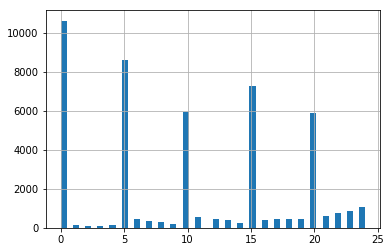

In [177]:
% matplotlib inline
pd.Series(phy_actions).hist(bins=50)

In [172]:
import pickle as pkl

In [175]:
pkl.dump(a, open('test_phy_actions_3m.pkl', 'wb'))
pkl.dump(physician_q, open('test_phy_q_3m.pkl', 'wb'))
pkl.dump(agent_a, open('test_agent_actions_3m.pkl', 'wb'))
pkl.dump(agent_q, open('test_agent_q_3m.pkl', 'wb'))

In [271]:
train_a, train_agent_a, train_physician_q, train_agent_q = predict(train_trajectory)

Trying to load model...
INFO:tensorflow:Restoring parameters from ./dqn_test/2m/ckpt
Model restored


In [291]:
test_trajectory.shape

(46971, 402)

In [279]:
train_agent_actions_3m = pkl.load(open('results/0.2m/test_agent_actions.pkl', 'rb'))

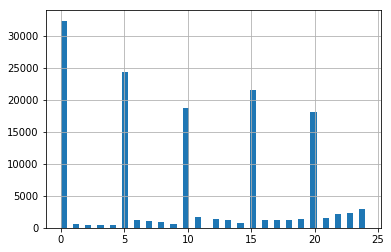

In [288]:
% matplotlib inline
pd.Series(train_a).hist(bins=50)

In [199]:
import pickle as pkl
pkl.dump(a, open('train_phy_actions_3m.pkl', 'wb'))
pkl.dump(train_physician_q, open('train_phy_q_3m.pkl', 'wb'))
pkl.dump(train_agent_a, open('train_agent_actions_3m.pkl', 'wb'))
pkl.dump(train_agent_q, open('train_agent_q_3m.pkl', 'wb'))

In [ ]:
pkl.dump(train_a, open('test_phy_actions_3m.pkl', 'wb'))
pkl.dump(train_physician_q, open('test_phy_q_3m.pkl', 'wb'))
pkl.dump(agent_a, open('test_agent_actions_3m.pkl', 'wb'))
pkl.dump(train_agent_q, open('test_agent_q_3m.pkl', 'wb'))

In [190]:
steps, costs = zip(*cost_hist)

## Producing Results

In [325]:
def get_sa_seq(df):
    s = df.values[:,:200]
    vasos, ivs =  df.values[:,200],  df.values[:,201]
    a = []
    for vaso, iv in zip(vasos, ivs):
        a += [action_map[ (iv, vaso) ]]
    return s, a

### Test set

In [326]:
test_s, test_a = get_sa_seq(test)

In [338]:
test_a, test_agent_actions, test_physician_q, test_agent_q = predict((test_s, test_a))

Trying to load model...
INFO:tensorflow:Restoring parameters from ./dqn_test/2m/ckpt
Model restored


In [345]:
np.mean(test_physician_q), np.mean(test_agent_q)

(7.4440169, 8.2226715)

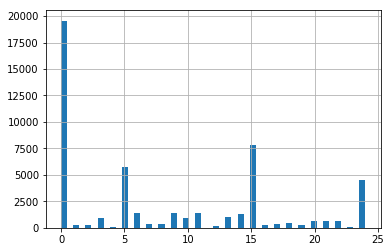

In [339]:
pd.Series(test_agent_actions).hist(bins=50)

### Train set

In [327]:
train_s, train_a = get_sa_seq(train)

In [341]:
train_a, train_agent_actions, train_physician_q, train_agent_q = predict((train_s, train_a))

Trying to load model...
INFO:tensorflow:Restoring parameters from ./dqn_test/2m/ckpt
Model restored


In [346]:
np.mean(train_physician_q), np.mean(train_agent_q)

(7.5419569, 8.2002687)

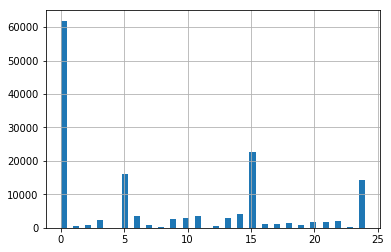

In [342]:
pd.Series(train_agent_actions).hist(bins=50)

In [347]:
pkl.dump(train_agent_actions, open('results/with_end_state/train_agent_actions_2m.pkl', 'wb'))
pkl.dump(test_agent_actions, open('results/with_end_state/test_agent_actions_2m.pkl', 'wb'))